# Simulation based empirical part

This part has three steps and its aim is to evaluate how profitable is the strategy of an investor affected bz the Gambler's Fallacy. For that we define behavior of four virtual investors using results of pszchological research about Gambler's Fallacy.

1) Simulation on generated random walk
 - generate a set of RW with different parameters (drift positive, zero, negative)
 - calibrate behavior of the four investors
 - let the investors operate step by step on these matkets simulated by RW
 - compare their profit

2) Simulation on real historical data
 - download weekly data 2012 - 2022
 - let the investors operate step by step on these matkets simulated by RW
 - compare their profit
 
3) Frequency analysis of historical data
 - count the occurence of each pattern of evolution of stock prices 
 - result on it with regard onn the definition of investors

In [1]:
library("stats")
#install.packages("hash")
library("hash")
#install.packages("gtools")
library("gtools")
#install.packages("readxl")
library("readxl")
#install.packages("writexl")
library("writexl")
#install.packages("stringr")
library("stringr")
#install.packages("openxlx")
library("openxlx")


  There is a binary version available but the source version is later:
      binary  source needs_compilation
hash 2.2.6.1 2.2.6.2             FALSE



installing the source package 'hash'

hash-2.2.6.2 provided by Decision Patterns




  There is a binary version available but the source version is later:
       binary source needs_compilation
gtools  3.8.2  3.9.4              TRUE

  Binaries will be installed
package 'gtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asus\AppData\Local\Temp\RtmpaoyjeB\downloaded_packages


Warning message:
"package 'gtools' was built under R version 3.6.3"


  There is a binary version available but the source version is later:
       binary source needs_compilation
readxl  1.3.1  1.4.2              TRUE

  Binaries will be installed
package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asus\AppData\Local\Temp\RtmpaoyjeB\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.0  1.4.2              TRUE

  Binaries will be installed
package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asus\AppData\Local\Temp\RtmpaoyjeB\downloaded_packages


Warning message:
"package 'writexl' was built under R version 3.6.3"also installing the dependencies 'cli', 'glue', 'lifecycle', 'rlang'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.1              TRUE
glue       1.4.2  1.6.2              TRUE
lifecycle  1.0.0  1.0.3             FALSE
rlang     0.4.11  1.1.0              TRUE
stringr    1.4.0  1.5.0             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asus\AppData\Local\Temp\RtmpaoyjeB\downloaded_packages


installing the source packages 'lifecycle', 'stringr'

Warning message in install.packages("stringr"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("stringr"):
"installation of package 'stringr' had non-zero exit status"

ERROR: Error in library("stringr"): there is no package called 'stringr'


In [2]:
set.seed(2021)

## 1) Generate stock prices as a random walk

In [3]:
# RW function simulates RW without shift
RW = function(N, x0, mu, variance) {
    z = cumsum(rnorm(n=N, mean=0, 
                  sd=sqrt(variance)))
    t = 1:N
    x = x0+t*mu+z
    return(x)
  }


In [5]:
#RWs generators: generates a set or RWs with the same parameters
GenerateRW = function(Nperiod, Nwalk, mu, sigma){
    W0 = 0

    RWS = list()
    for (i in 1:Nwalk){
        RWS[[i]]=RW(Nperiod, W0, mu, sigma)
    }
    for (i in 1:Nwalk){
        plot(RWS[[i]], main="Random Walks", 
        xlab="t",ylab="Price", ylim=c(-500,500),
        typ='l', col="red")
        par(new=T)
    }
    return(RWS)
}


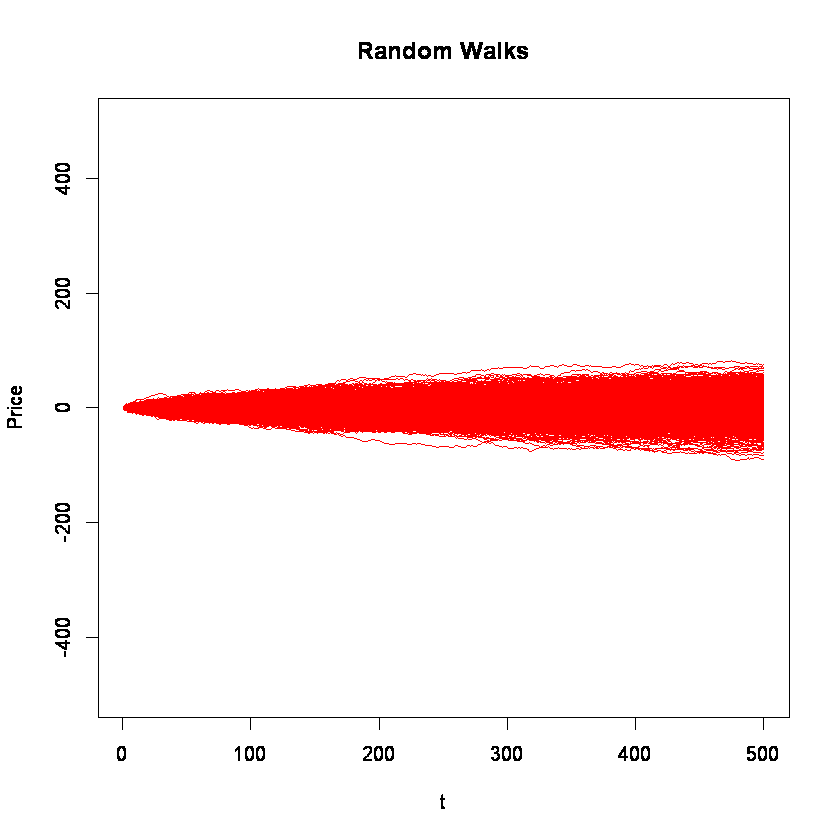

In [6]:
RW0 = GenerateRW(500, 500, 0, 1)
RWplus = GenerateRW(500, 500, 0.02, 1)
RWminus = GenerateRW(500, 500, -0.02, 1)

## 2) Investors' decision making simulation

In [7]:
#transforms a timeseries to a binary one 1 - growing, 0 - not growing period
Binary = function (evol){
    N = length(evol)
    evobin = vector(length = N-1)
    for (i in 2:N){
        if (evol[i] > evol[i-1]){
            evobin[i-1] = 1
            }
        else{
            evobin[i-1] = 0
            }
        }
    return(evobin)
    }

#transforms a timeseries to timeseries with growth during one period
Differences = function(TS){
    N = length(TS)
    walk = vector(length = N-1)
    for(i in (1:(N-1))){
        walk[i] = TS[i+1] - TS[i]
        }
    return(walk)
    }

#counts the length of a subsequence of the same value
Sequence = function(RW){
    N = length(RW)
    bin = Binary(RW)
    seq = vector(length = N-1)
    count = 0  
    prev = .Machine$integer.max
    for (i in 1:(N-1)){
        if (prev == bin[i]){
            count = count + 1
            prev = bin[i]
            #print("plus")
            }
        else{
            count = 0
            prev = bin[i]
            #print("jine")
            }
        seq[i] = count
    }
    return(seq)
}

In [8]:

# definition of decision making probabilities of different investors for following cases derived from psychological papers
cases = list(c(0,0,0,0), c(0,0,0,1), c(0,0,1,0), c(0,0,1,1), c(0,1,0,0), c(0,1,0,1), c(0,1,1,0), c(0,1,1,1), c(1,0,0,0), c(1,0,0,1), c(1,0,1,0), c(1,0,1,1), c(1,1,0,0), c(1,1,0,1), c(1,1,1,0), c(1,1,1,1))
tabRandom = seq(0.5, 0.5, length.out = 16)
tabGambler = c(0.619, 0.438, 0.562, 0.456, 0.544, 0.438, 0.562, 0.369, 0.631, 0.438, 0.562, 0.456, 0.544, 0.438, 0.562, 0.381)
tabBoyntonS = c(0.41, 0.69, 0.35, 0.66, 0.39, 0.59, 0.3, 0.59, 0.41, 0.7, 0.41, 0.61, 0.34, 0.65, 0.31, 0.59)
tabBoyntonF = c(0.83, 0.7, 0.49, 0.46, 0.66, 0.59, 0.29, 0.33, 0.67, 0.71, 0.41, 0.34, 0.54, 0.51, 0.3, 0.17)
tabSeller = seq(0, 0, length.out = 16)
tabBuyer = seq(1, 1, length.out = 16)
    

In [9]:
#evaluate equality of two vectors of the same length
EqualVec = function(vec1, vec2){
    equality = TRUE
    for (i in 1:length(vec1)){
        if (vec1[i] != vec2[i]){
            equality = FALSE
        }
    }
    return (equality)
}

# find the index of the subsequence corresponding to the position in a vector
FindSequence = function(vect, case){
    index = 1
    while (EqualVec(case, vect[[index]]) == FALSE){
        index = index + 1
    }
return(index)    
}

# function shifts the sequence by one to the left and adds "new" at the end
Shift = function(seq, new){
    N = length(seq)
    for (i in 1:(N-1)){
        seq[i] = seq[i+1]
    }
    seq[N] = new
    return(seq)
}

In [10]:
# function calculates the final wealth of an investor based on the evolution of prices, initial wealth and tables of probabilities of individual investors
    # RW - price evolution
    # W0 - initial wealth
    # tabsuc - table of probabilities of an investor (in case of Boynton, the probabilities in case of previous success)
    # tabfail - only for Boynton, probabilities in case of previous fail

Investor = function(RW, W0, tabsuc, tabfail = NULL){
    N = length(RW)
    bin = Binary(RW)
    wealth = W0
    sequence = bin[1:4]
    index = 4
    suc = -1
    cases = list(c(0,0,0,0), c(0,0,0,1), c(0,0,1,0), c(0,0,1,1), c(0,1,0,0), c(0,1,0,1), c(0,1,1,0), c(0,1,1,1), c(1,0,0,0), c(1,0,0,1), c(1,0,1,0), c(1,0,1,1), c(1,1,0,0), c(1,1,0,1), c(1,1,1,0), c(1,1,1,1))
    
    # if it is not Boynton, we do not distinguish between succes and fail
    if (is.null(tabfail)){
        tabfail = tabsuc
    }
    # first 4 periods when investor can't look to the history
    for (i in 1:4){
        prob = mean(tabsuc)
        dec = rbinom(1, 1, prob)
        
        if (dec == 1){
            gain = (RW[i+1] - RW[i])     
        }
        else if (dec == 0){
            gain = (RW[i] - RW[i+1])
        }
        wealth = wealth + gain
        if (gain >= 0){ 
            suc = 1
        }
        else{
            suc = 0
        }
    }   
    for (i in 5:(N-1)){
# find the case of historical evolution
        case = FindSequence(cases, sequence)
        
# choose the rigth probability table according to previous success
        if (suc == 1){
            tab = tabsuc
        }
        else{
            tab = tabfail
        }
        
#decision making
        prob = tab[case]
        dec = rbinom(1, 1, prob)
        if (dec == 1){
            diff = (RW[i+1] - RW[i])
            gain = diff
            if (is.na(gain)){
                gain = 0
            }
            typeof(diff)
            typeof(gain)
        }
        else if (dec == 0){
            diff = (RW[i] - RW[i+1])
            gain = diff
            if (is.na(gain)){
                gain = 0
            }
        }
#wealth after the period
        wealth = wealth + gain
# was it a success?
        if (diff >= 0){ 
            suc = 1
        }
        else{
            suc = 0
        }
    
        sequence = Shift(sequence, bin[i])
    }
    return(wealth)
}
    

In [11]:
# function calculates the final wealth of an investor based on the evolution of prices, initial wealth and tables of probabilities of individual investors
    # RW - price evolution
    # W0 - initial wealth
    # tabsuc - table of probabilities of an investor (in case of Boynton, the probabilities in case of previous success)
    # tabfail - only for Boynton, probabilities in case of previous fail

ReInvestor = function(RW, W0, tabsuc, tabfail = NULL){
    N = length(RW)
    bin = Binary(RW)
    wealth = W0
    sequence = bin[1:4]
    index = 4
    suc = -1
    cases = list(c(0,0,0,0), c(0,0,0,1), c(0,0,1,0), c(0,0,1,1), c(0,1,0,0), c(0,1,0,1), c(0,1,1,0), c(0,1,1,1), c(1,0,0,0), c(1,0,0,1), c(1,0,1,0), c(1,0,1,1), c(1,1,0,0), c(1,1,0,1), c(1,1,1,0), c(1,1,1,1))
    
# if it is not Boynton, we do not distinguish between succes and fail
    if (is.null(tabfail)){
        tabfail = tabsuc
    }
# first 4 periods when investor can't look to the history
    for (i in 1:4){
        prob = mean(tabsuc)
        dec = rbinom(1, 1, prob)
        
        if (dec == 1){
            gain = (RW[i+1] - RW[i])/RW[i]     
        }
        else if (dec == 0){
            gain = (RW[i] - RW[i+1])/RW[i]
        }
        wealth = wealth * (1+gain)
        if (gain > 0){ 
            suc = 1
        }
        else{
            suc = 0
        }
    }   
    for (i in 5:(N-1)){
# find the case of historical evolution
        case = FindSequence(cases, sequence)
        
# choose the rigth probability table according to previous success
        if (suc == 1){
            tab = tabsuc
        }
        else{
            tab = tabfail
        }
        
#decision making
        prob = tab[case]
        dec = rbinom(1, 1, prob)
        if (dec == 1){
            gain = (RW[i+1] - RW[i])/RW[i]     
        }
        else if (dec == 0){
            gain = (RW[i] - RW[i+1])/RW[i]
        }
#wealth after the period
        wealth = wealth*(1 + gain)
# was it a success?
        if (gain > 0){ 
            suc = 1
        }
        else{
            suc = 0
        }
    
        sequence = Shift(sequence, bin[i])
    }
    return(wealth)
}
    

In [12]:
# function calculates the final wealth of an investor based on the evolution of prices, initial wealth and tables of probabilities of individual investors
    # RW - price evolution
    # W0 - initial wealth
    # tabsuc - table of probabilities of an investor (in case of Boynton, the probabilities in case of previous success)
    # tabfail - only for Boynton, probabilities in case of previous fail

ReInvestorPlus = function(RW, W0, tabsuc, tabfail = NULL){
    N = length(RW)
    bin = Binary(RW)
    wealth = W0
    sequence = bin[1:4]
    index = 4
    suc = -1
    cases = list(c(0,0,0,0), c(0,0,0,1), c(0,0,1,0), c(0,0,1,1), c(0,1,0,0), c(0,1,0,1), c(0,1,1,0), c(0,1,1,1), c(1,0,0,0), c(1,0,0,1), c(1,0,1,0), c(1,0,1,1), c(1,1,0,0), c(1,1,0,1), c(1,1,1,0), c(1,1,1,1))
    
# if it is not Boynton, we do not distinguish between succes and fail
    if (is.null(tabfail)){
        tabfail = tabsuc
    }
# first 4 periods when investor can't look to the history
    for (i in 1:4){
        prob = mean(tabsuc)
        dec = rbinom(1, 1, prob)
        
        if (dec == 1){
            gain = (RW[i+1] - RW[i])/RW[i]     
        }
        else if (dec == 0){
            gain = (RW[i] - RW[i+1])/RW[i]
        }
        wealth = (wealth+1)*(1+ gain)
        if (gain > 0){ 
            suc = 1
        }
        else{
            suc = 0
        }
    }   
    for (i in 5:(N-1)){
# find the case of historical evolution
        case = FindSequence(cases, sequence)
      
# choose the rigth probability table according to previous success
        if (suc == 1){
            tab = tabsuc
        }
        else{
            tab = tabfail
        }
        
#decision making
        prob = tab[case]
        dec = rbinom(1, 1, prob)
        if (dec == 1){
            gain = (RW[i+1] - RW[i])/RW[i]     
        }
        else if (dec == 0){
            gain = (RW[i] - RW[i+1])/RW[i]
        }
#wealth after the period
        wealth = (wealth + 1)*(1 + gain)
# was it a success?
        if (gain > 0){ 
            suc = 1
        }
        else{
            suc = 0
        }
    
        sequence = Shift(sequence, bin[i])
    }
    return(wealth)
}
    

In [13]:
# function tests the average performance of investors in the basic setup
TestRW = function(RWS, Nwalks, Ninvest){
    Nperiod = length(RWS[[1]])
    res = vector(length = 5)
    resRandom = vector(length = Ninvest)
    resGambler = vector(length = Ninvest)
    resBoynton = vector(length = Ninvest)
    resSeller = vector(length = Ninvest)
    resBuyer = vector(length = Ninvest)
    
    AVGresRandom = vector(length = Nwalks)
    AVGresGambler = vector(length = Nwalks)
    AVGresBoynton = vector(length = Nwalks)
    AVGresSeller = vector(length = Nwalks)
    AVGresBuyer = vector(length = Nwalks)
    
    for(j in 1:Nwalks){
        RWpom = RWS[[j]]
        res = vector(length = Ninvest)
        for (i in 1:Ninvest){
            resRandom[i] = Investor(RWpom, 0, tabRandom)
            resGambler[i] = Investor(RWpom, 0, tabGambler)
            resBoynton[i] = Investor(RWpom, 0, tabBoyntonS, tabBoyntonF)
            resSeller[i] = Investor(RWpom, 0, tabSeller)
            resBuyer[i] = Investor(RWpom, 0, tabBuyer)
        }
        AVGresRandom[j] = mean(resRandom)
        AVGresGambler[j] = mean(resGambler)
        AVGresBoynton[j] = mean(resBoynton)
        AVGresSeller[j] = mean(resSeller)
        AVGresBuyer[j] = mean(resBuyer)
        
        
    }
    #par(mfrow=c(3,2))
    #hist(resRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
    #hist(resGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
    #hist(resBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
    #hist(resSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
    #hist(resBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")
    
    #a = t.test(AVGresRandom, AVGresGambler)$p.value
    #b = t.test(AVGresRandom, AVGresBoynton)$p.value
    #c = t.test(AVGresRandom, AVGresSeller)$p.value
    #d = t.test(AVGresRandom, AVGresBuyer)$p.value
    #pvalues = c(a, b, c, d)
    #names(pvalues) = c('Random & Gambler', 'Random & Boynton', 'Random & Seller', 'Random & Buyer')
    #print(pvalues)
    
    #par(mfrow=c(3,2))
     #   hist(AVGresRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
      #  hist(AVGresGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
       # hist(AVGresBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
        #hist(AVGresSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
        #hist(AVGresBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")

    
res = c(mean(AVGresRandom), mean(AVGresGambler), mean(AVGresBoynton), mean(AVGresSeller), mean(AVGresBuyer))
names(res) = c("Random", "Gambler", "Boynton", "Seller", "Buyer")
return(res)
}

In [14]:
# function tests the average performance of investors i the case of reinvestment
ReTestRW = function(RWS, Nwalks, Ninvest){
    Nperiod = length(RWS[[1]])
    res = vector(length = 5)
    resRandom = vector(length = Ninvest)
    resGambler = vector(length = Ninvest)
    resBoynton = vector(length = Ninvest)
    resSeller = vector(length = Ninvest)
    resBuyer = vector(length = Ninvest)
    
    AVGresRandom = vector(length = Nwalks)
    AVGresGambler = vector(length = Nwalks)
    AVGresBoynton = vector(length = Nwalks)
    AVGresSeller = vector(length = Nwalks)
    AVGresBuyer = vector(length = Nwalks)
    
    for(j in 1:Nwalks){
        RWpom = RWS[[j]]
        res = vector(length = Ninvest)
        for (i in 1:Ninvest){
            resRandom[i] = ReInvestor(RWpom, 1, tabRandom)
            resGambler[i] = ReInvestor(RWpom, 1, tabGambler)
            resBoynton[i] = ReInvestor(RWpom, 1, tabBoyntonS, tabBoyntonF)
            resSeller[i] = ReInvestor(RWpom, 1, tabSeller)
            resBuyer[i] = ReInvestor(RWpom, 1, tabBuyer)
        }
        AVGresRandom[j] = mean(resRandom)
        AVGresGambler[j] = mean(resGambler)
        AVGresBoynton[j] = mean(resBoynton)
        AVGresSeller[j] = mean(resSeller)
        AVGresBuyer[j] = mean(resBuyer)
        
        
    }
    #par(mfrow=c(3,2))
    #hist(resRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
    #hist(resGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
    #hist(resBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
    #hist(resSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
    #hist(resBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")
    
    #a = t.test(AVGresRandom, AVGresGambler)$p.value
    #b = t.test(AVGresRandom, AVGresBoynton)$p.value
    #c = t.test(AVGresRandom, AVGresSeller)$p.value
    #d = t.test(AVGresRandom, AVGresBuyer)$p.value
    #pvalues = c(a, b, c, d)
    #names(pvalues) = c('Random & Gambler', 'Random & Boynton', 'Random & Seller', 'Random & Buyer')
    #print(pvalues)
    
    #par(mfrow=c(3,2))
     #   hist(AVGresRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
      #  hist(AVGresGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
       # hist(AVGresBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
        #hist(AVGresSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
        #hist(AVGresBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")

    
res = c(mean(AVGresRandom), mean(AVGresGambler), mean(AVGresBoynton), mean(AVGresSeller), mean(AVGresBuyer))
names(res) = c("Random", "Gambler", "Boynton", "Seller", "Buyer")
return(res)
}

In [15]:
# function tests the average performance of investors in the case of reinvestment and gain of value of 1 in each period
ReTestRWPlus = function(RWS, Nwalks, Ninvest){
    Nperiod = length(RWS[[1]])
    res = vector(length = 5)
    resRandom = vector(length = Ninvest)
    resGambler = vector(length = Ninvest)
    resBoynton = vector(length = Ninvest)
    resSeller = vector(length = Ninvest)
    resBuyer = vector(length = Ninvest)
    
    AVGresRandom = vector(length = Nwalks)
    AVGresGambler = vector(length = Nwalks)
    AVGresBoynton = vector(length = Nwalks)
    AVGresSeller = vector(length = Nwalks)
    AVGresBuyer = vector(length = Nwalks)
    
    for(j in 1:Nwalks){
        RWpom = RWS[[j]]
        res = vector(length = Ninvest)
        for (i in 1:Ninvest){
            resRandom[i] = ReInvestorPlus(RWpom, 1, tabRandom)
            resGambler[i] = ReInvestorPlus(RWpom, 1, tabGambler)
            resBoynton[i] = ReInvestorPlus(RWpom, 1, tabBoyntonS, tabBoyntonF)
            resSeller[i] = ReInvestorPlus(RWpom, 1, tabSeller)
            resBuyer[i] = ReInvestorPlus(RWpom, 1, tabBuyer)
        }
        AVGresRandom[j] = mean(resRandom)
        AVGresGambler[j] = mean(resGambler)
        AVGresBoynton[j] = mean(resBoynton)
        AVGresSeller[j] = mean(resSeller)
        AVGresBuyer[j] = mean(resBuyer)
        
        
    }
    #par(mfrow=c(3,2))
    #hist(resRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
    #hist(resGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
    #hist(resBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
    #hist(resSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
    #hist(resBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")
    
    #a = t.test(AVGresRandom, AVGresGambler)$p.value
    #b = t.test(AVGresRandom, AVGresBoynton)$p.value
    #c = t.test(AVGresRandom, AVGresSeller)$p.value
    #d = t.test(AVGresRandom, AVGresBuyer)$p.value
    #pvalues = c(a, b, c, d)
    #names(pvalues) = c('Random & Gambler', 'Random & Boynton', 'Random & Seller', 'Random & Buyer')
    #print(pvalues)
    
    #par(mfrow=c(3,2))
     #   hist(AVGresRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
      #  hist(AVGresGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
       # hist(AVGresBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
        #hist(AVGresSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
        #hist(AVGresBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")

    
res = c(mean(AVGresRandom), mean(AVGresGambler), mean(AVGresBoynton), mean(AVGresSeller), mean(AVGresBuyer))
names(res) = c("Random", "Gambler", "Boynton", "Seller", "Buyer")
return(res)
}

## Test of results

Here we calculate results of all investors operating on RW with no drift, positive drift and negative drift. We use 500 RW that are 500 periods long and each investor operates 500 times on each RW.

In [22]:
TestRW(RW0, 500, 500)
TestRW(RWplus, 500, 500)
TestRW(RWminus, 500, 500)

Random     Gambler     Boynton      Seller       Buyer 
 0.05567527  0.11541161  0.05938984 -1.94156308  1.94156308

Random      Gambler      Boynton       Seller        Buyer 
 -0.02969765  -0.03979140   0.02602214 -10.52476908  10.52476908

Random     Gambler     Boynton      Seller       Buyer 
 -0.0550025  -0.1218407   0.2943781  10.8192839 -10.8192839

In [277]:
ReTestRW(RW0, 500, 500)
ReTestRW(RWplus, 500, 500)
ReTestRW(RWminus, 500, 500)

Random       Gambler       Boynton        Seller         Buyer 
-2.854174e+16  1.099682e+14 -2.846782e+14 -3.676129e+19  2.221238e+01

Random      Gambler      Boynton       Seller        Buyer 
 -27809.3486 -968953.8169 -465087.7933  -13443.5935     224.9544

Random       Gambler       Boynton        Seller         Buyer 
-1789.6452894  -682.1802852 -2956.8670467     0.1964031     7.5953874

In [281]:
ReTestRWPlus(RW0, 500, 500)
ReTestRWPlus(RWplus, 500, 500)
ReTestRWPlus(RWminus, 500, 500)

Random       Gambler       Boynton        Seller         Buyer 
 4.001724e+35  7.731496e+26  8.721821e+25 -2.263614e+28  4.585071e+02

Random       Gambler       Boynton        Seller         Buyer 
10590075.1027   -97143.0116  -542441.1843    -5872.2617      972.9019

Random       Gambler       Boynton        Seller         Buyer 
-1.162920e+08  2.096700e+07 -7.213079e+06 -1.069403e+07  4.458811e+03

# 2) Simulation on real, historical data

### Data downloading

In [22]:
# downloading and cleaning S&P 500 weekly data from 2012 to 2022
SAPindata = read_excel("C:\\Users\\asus\\Desktop\\DP4\\DP\\DATA\\SaPdata457.xlsx")
SAPnames = names(SAPindata[2:456])
SAPindata = SAPindata[2:456]
length(SAPnames)
length(SAPindata)

New names:
* `` -> ...1


[1] 455

[1] 455

In [23]:
#transforms data to a readable format
ReadData = function(stocks){
    N = length(stocks)
    database = list()
    for(i in 1:N){
        stock = stocks[i]
        path = paste("C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\Healthcare\\",stock,".xlsx", sep="")
        #print(path)
        read = read_excel(path)
        database[[i]] = as.numeric(read[[2]][length(read[[2]]):18])
    }
    return(database)
}



In [24]:
# function tests the average performance of investors using three different investment setups
# setup - basic/ reinvest/ reinvestplus
TestData = function(walk, Ninvest, setup){
    Nperiod = length(walk)
    
    resRandom = vector(length = Ninvest)
    resGambler = vector(length = Ninvest)
    resBoynton = vector(length = Ninvest)
    resSeller = vector(length = Ninvest)
    resBuyer = vector(length = Ninvest)
    
    
  
    if (setup== "basic"){   
        for (i in 1:Ninvest){
            resRandom[i] = Investor(walk, 0, tabRandom)
            resGambler[i] = Investor(walk, 0, tabGambler)
            resBoynton[i] = Investor(walk, 0, tabBoyntonS, tabBoyntonF)
            resSeller[i] = Investor(walk, 0, tabSeller)
            resBuyer[i] = Investor(walk, 0, tabBuyer)
   
        }
    }
    
    if (setup== "reinvest"){ 
        for (i in 1:Ninvest){
            resRandom[i] = ReInvestor(walk, 1, tabRandom)
            resGambler[i] = ReInvestor(walk, 1, tabGambler)
            resBoynton[i] = ReInvestor(walk, 1, tabBoyntonS, tabBoyntonF)
            resSeller[i] = ReInvestor(walk, 1, tabSeller)
            resBuyer[i] = ReInvestor(walk, 1, tabBuyer)
        }
    }
    
    if (setup== "reinvestplus"){ 
        for (i in 1:Ninvest){
            resRandom[i] = ReInvestorPlus(walk, 1, tabRandom)
            resGambler[i] = ReInvestorPlus(walk, 1, tabGambler)
            resBoynton[i] = ReInvestorPlus(walk, 1, tabBoyntonS, tabBoyntonF)
            resSeller[i] = ReInvestorPlus(walk, 1, tabSeller)
            resBuyer[i] = ReInvestorPlus(walk, 1, tabBuyer)
        }
    }

    #a = t.test(resRandom, resGambler)$p.value
    #b = t.test(resRandom, resBoynton)$p.value
    #c = t.test(resRandom, resSeller)$p.value
    #d = t.test(resRandom, resBuyer)$p.value
    #pvalues = c(a, b, c, d)
    #names(pvalues) = c('Random & Gambler', 'Random & Boynton', 'Random & Seller', 'Random & Buyer')
   # print(pvalues)
    
    par(mfrow=c(3,2))
        hist(resRandom, col = 'blue', main="Distribution of final wealth of a random investor", ylab="Frequency", xlab="Final wealth")
        hist(resGambler, col = 'green', main="Distribution of final wealth of an investor with Gambler's fallacy", ylab="Frequency", xlab="Final wealth")
        hist(resBoynton, col = 'red', main="Distribution of final wealth of a Boynton", ylab="Frequency", xlab="Final wealth")
        hist(resSeller, col = 'orange', main="Distribution of final wealth of a seller", ylab="Frequency", xlab="Final wealth")
        hist(resBuyer, col = 'pink', main="Distribution of final wealth of a buyer", ylab="Frequency", xlab="Final wealth")

    
res = c(mean(resRandom), mean(resGambler), mean(resBoynton), mean(resSeller), mean(resBuyer))


return(res)
}

In [28]:
#Using the TestData function, this function creates the final dataset of results after investment of investors
MakeDF = function(data, names, setup){
    N = length(names)
    avgs = vector(length = 5)
    investors = c('Random', 'Gambler', 'Boynton', 'Seller', 'Buyer')
    DFhist = data.frame(investors)
    for (i in 1:N){
        new = TestData(data[[i]],1000, setup)
        
        DFhist[,ncol(DFhist)+1] = new
        colnames(DFhist)[ncol(DFhist)] = names[i]
    }
    for (j in 1:5){
        avgs[j] = sum(as.numeric(DFhist[j,]))
    }
    DFhist[,ncol(DFhist)+1] = avgs
    colnames(DFhist)[ncol(DFhist)] = "sum"
    return(DFhist)
}

In [30]:
finalDF = MakeDF(SAPindata, SAPnames, "reinvest")
finalDF

investors POOL.OQ     CHRW.OQ   AJG.N     CNP.N     WM.N      BA.N      
1 Random     1.03848031 1.0263691 0.9709548 1.0047070 1.0091288 1.11750579
2 Gambler    1.10201237 1.2350110 0.9131949 1.1462543 1.0524451 1.02096952
3 Boynton    0.59039333 0.6924536 0.8647488 1.1221897 0.8977607 0.81444841
4 Seller     0.04487677 0.3626087 0.1369144 0.2974513 0.1615676 0.04444112
5 Buyer     11.50284168 1.5836916 4.9000000 1.5933504 4.5516947 2.59220003
  LIN.N     WY.N      MCD.N     ... MKTX.OQ   LMT.N     DLR.N     SCHW.N    
1 1.0045909 0.9639018 0.9569856 ... 0.9588071 1.0214660 0.9882268 0.98726048
2 1.2132517 1.2138917 0.9844918 ... 1.0625975 1.1420258 1.1572583 1.02565819
3 1.0021706 0.8534634 0.8664602 ... 1.1718380 0.8025501 1.1262086 0.84387583
4 0.2280389 0.2007508 0.2861449 ... 0.0449330 0.1285199 0.2746718 0.06386857
5 2.8324557 1.8568177 2.5273778 ... 9.0638184 4.9470882 1.9863853 5.86245614
  DXC.N      SNPS.OQ     J.N       SIVB.OQ    AVY.N      sum       
1 1.07767749  1.00029981 0.9992527 0.98627463 0.97114727  458.24795
2 0.88832731  0.89840018 1.1996907 1.32303151 0.94979632  495.59494
3 0.87157864  0.90733354 1.0895190 0.78500381 0.73023206  431.87379
4 0.04988945  0.05073583 0.1436569 0.02700436 0.09218313   81.49526
5 2.93119243 11.08838133 3.1889422 8.60836084 5.86202277 2215.63515

In [26]:
#Plot the results of investment of different investors
PlotDF = function (data, names){
    #rows = (length(names) %/% 4) + 1
    par(mfrow=c(5,4))
    for(i in 1:20){
        plot(data[[i]], typ = 'l', col = 'blue', main= names[i], ylab="Stock price", xlab="Time")
    }
}

In [29]:
# function creates a dataframe with investors' results per industry
# it uses the dataframe of all results and sort them by industry
DFindustry = function (DF, names){
    N = length(names)
    avgs = vector(length = 5)
    investors = c('Random', 'Gambler', 'Boynton', 'Seller', 'Buyer')
    DFhist = data.frame(investors)
    for (i in 1:N){
        index = which(colnames(finalDF) == names[i])
        DFhist[,ncol(DFhist)+1] = DF[index]
        colnames(DFhist)[ncol(DFhist)] = names[i]
    }
    for (j in 1:5){
        avgs[j] = sum(as.numeric(DFhist[j,]))
    }
    DFhist[,ncol(DFhist)+1] = avgs
    colnames(DFhist)[ncol(DFhist)] = "sum"
    return(DFhist)
}

### S&P index by sector

In [21]:
#Names of all stocks included in different industries (serves for further work)
#Consumer Discretionary sector (60)
ConDis = c("AAP.N", "AMZN.OQ", "APTV.N", "AZO.N", "BBWI.N", "BBY.N", "BKNG.OQ", "BWA.N", "CCL.N", "CMG.N", "CZR.OQ", "DG.N", "DHI.N", "DLTR.OQ", "DPZ.N", "DRI.N", "EBAY.OQ", "ETSY.OQ", "EXPE.OQ", "F.N", "GM.N", "GPC.N", "GRMN.N", "HAS.OQ", "HD.N", "HLT.N", "KMX.N", "LEN.N", "LKQ.OQ", "LOW.N", "LVS.N", "MAR.OQ", "MCD.N", "MGM.N", "MHK.N", "NCLH.N", "NKE.N", "NVR.N", "NWL.OQ", "ORLY.OQ", "PENN.OQ", "PHM.N", "POOL.OQ", "PVH.N", "RCL.N", "RL.N", "ROST.OQ", "SBUX.OQ", "TGT.N", "TJX.N", "TPR.N", "TSCO.OQ", "TSLA.OQ", "UA.N", "UAA.N", "ULTA.OQ", "VFC.N", "WHR.N", "WYNN.OQ", "YUM.N")
#Consumer Staples sector (32)
ConSta = c("ADM.N", "BFb.N", "CAG.N", "CHD.N", "CL.N", "CLX.N", "COST.OQ", "CPB.N", "EL.N", "GIS.N", "HRL.N", "HSY.N", "K.N", "KHC.OQ", "KMB.N", "KO.N", "KR.N", "LW.N", "MDLZ.OQ", "MKC.N", "MNST.OQ", "MO.N", "PEP.OQ", "PG.N", "PM.N", "SJM.N", "STZ.N", "SYY.N", "TAP.N", "TSN.N", "WBA.OQ", "WMT.N")
#Energy sector
Energy = c("APA.OQ", "BKR.OQ", "COP.N", "CTRA.N", "CVX.N", "DVN.N", "EOG.N", "FANG.OQ", "HAL.N", "HES.N", "KMI.N", "MPC.N", "MRO.N", "OKE.N", "OXY.N", "PSX.N", "PXD.N", "SLB.N", "VLO.N", "WMB.N", "XOM.N")
#Financials sector
Financial = c("AFL.N", "AIG.N", "AIZ.N", "AJG.N", "ALL.N", "AMP.N", "AON.N", "AXP.N", "BAC.N", "BEN.N", "BK.N", "BLK.N", "BRKb.N", "BRO.N", "C.N", "CB.N", "CBOE.Z", "CFG.N", "CMA.N", "CME.OQ", "COF.N", "DFS.N", "FDS.N", "FITB.OQ", "FRC.N", "GL.N", "GS.N", "HBAN.OQ", "HIG.N", "ICE.N", "IVZ.N", "JPM.N", "KEY.N", "LNC.N", "MCO.N", "MET.N", "MKTX.OQ", "MMC.N", "MS.N", "MSCI.N", "MTB.N", "NDAQ.OQ", "NTRS.OQ", "PFG.OQ", "PGR.N", "PNC.N", "PRU.N", "RE.N", "RF.N", "RJF.N", "SBNY.OQ", "SIVB.OQ", "SPGI.N", "STT.N", "SYF.N", "TFC.N", "TROW.OQ", "TRV.N", "USB.N", "WFC.N", "WRB.N", "WTW.OQ", "ZION.OQ")
#Health Care sector
Health = c("A.N", "ABBV.N", "ABC.N", "ABMD.OQ", "ABT.N", "ALGN.OQ", "AMGN.OQ", "ANTM.N", "BAX.N", "BDX.N", "BIIB.OQ", "BIO.N", "BMY.N", "BSX.N", "CAH.N", "CERN.OQ", "CI.N", "CNC.N", "COO.N", "CRL.N", "CTLT.N", "CVS.N", "DGX.N", "DHR.N", "DVA.N", "DXCM.OQ", "EW.N", "GILD.OQ", "HCA.N", "HOLX.OQ", "HSIC.OQ", "HUM.N", "IDXX.OQ", "ILMN.OQ", "INCY.OQ", "IQV.N", "ISRG.OQ", "JNJ.N", "LH.N", "LLY.N", "MCK.N", "MDT.N", "MRK.N", "MRNA.OQ", "MTD.N", "OGN.N", "PFE.N", "PKI.N", "REGN.OQ", "RMD.N", "STE.N", "SYK.N", "TECH.OQ", "TFX.N", "TMO.N", "UHS.N", "UNH.N", "VRTX.OQ", "VTRS.OQ", "WAT.N", "WST.N", "XRAY.OQ", "ZBH.N", "ZTS.N")
#Industrial sector
Industry = c("AAL.OQ", "ALK.N", "ALLE.N", "AME.N", "AOS.N", "BA.N", "CARR.N", "CAT.N", "CHRW.OQ", "CMI.N", "CPRT.OQ", "CSX.OQ", "CTAS.OQ", "DAL.N", "DE.N", "DOV.N", "EFX.N", "EMR.N", "ETN.N", "EXPD.OQ", "FAST.OQ", "FBHS.N", "FDX.N", "FTV.N", "GD.N", "GE.N", "GNRC.N", "GWW.N", "HII.N", "HON.OQ", "HWM.N", "IEX.N", "IR.N", "ITW.N", "J.N", "JBHT.OQ", "JCI.N", "LDOS.N", "LHX.N", "LMT.N", "LUV.N", "MAS.N", "MMM.N", "NDSN.OQ", "NLSN.N", "NOC.N", "NSC.N", "ODFL.OQ", "OTIS.N", "PCAR.OQ", "PH.N", "PNR.N", "PWR.N", "RHI.N", "ROK.N", "ROL.N", "ROP.N", "RSG.N", "RTX.N", "SNA.N", "SPGI.N", "SWK.N", "TDG.N", "TT.N", "TXT.N", "UAL.OQ", "UNP.N", "UPS.N", "URI.N", "VRSK.OQ", "WAB.N", "WM.N", "XYL.N")
#Information Technology sector
InfTech = c("ACN.N", "ADBE.OQ", "ADI.OQ", "ADP.OQ", "ADSK.OQ", "AKAM.OQ", "AMAT.OQ", "AMD.OQ", "ANET.N", "ANSS.OQ", "APH.N", "AVGO.OQ", "BR.N", "CDAY.N", "CDNS.OQ", "CDW.OQ", "CRM.N", "CSCO.OQ", "CTSH.OQ", "CTXS.OQ", "DXC.N", "ENPH.OQ", "EPAM.N", "FFIV.OQ", "FIS.N", "FISV.OQ", "FLT.N", "FTNT.OQ", "GLW.N", "GPN.N", "HPE.N", "HPQ.N", "IBM.N", "INTC.OQ", "INTU.OQ", "IPGP.OQ", "IT.N", "JKHY.OQ", "JNPR.N", "KEYS.N", "KLAC.OQ", "LRCX.OQ", "MA.N", "MCHP.OQ", "MPWR.OQ", "MSFT.OQ", "MSI.N", "MU.OQ", "NLOK.OQ", "NOW.N", "NTAP.OQ", "NVDA.OQ", "NXPI.OQ", "ORCL.N", "PAYC.N", "PAYX.OQ", "PTC.OQ", "PYPL.OQ", "QCOM.OQ", "QRVO.OQ", "SEDG.OQ", "SNPS.OQ", "STX.OQ", "SWKS.OQ", "TDY.N", "TEL.N", "TER.OQ", "TRMB.OQ", "TXN.OQ", "TYL.N", "V.N", "VRSN.OQ", "WDC.OQ", "ZBRA.OQ")
#Materials sector
Materials = c("ALB.N", "AMCR.N", "APD.N", "AVY.N", "BLL.N", "CE.N", "CF.N", "CTVA.N", "DD.N", "DOW.N", "ECL.N", "EMN.N", "FCX.N", "FMC.N", "IFF.N", "IP.N", "LIN.N", "LYB.N", "MLM.N", "MOS.N", "NEM.N", "NUE.N", "PKG.N", "PPG.N", "SEE.N", "SHW.N", "VMC.N", "WRK.N")
#Real estate sector
RealEst = c("AMT.N", "ARE.N", "AVB.N", "BXP.N", "CBRE.N", "CCI.N", "DLR.N", "DRE.N", "EQIX.OQ", "EQR.N", "ESS.N", "EXR.N", "FRT.N", "HST.OQ", "IRM.N", "KIM.N", "MAA.N", "O.N", "PEAK.N", "PLD.N", "PSA.N", "REG.OQ", "SBAC.OQ", "SPG.N", "UDR.N", "VNO.N", "VTR.N", "WELL.N", "WY.N")
#Communication Services sector
Communication = c("ATVI.OQ", "CHTR.OQ", "CMCSA.OQ", "DIS.N", "DISCK.OQ", "DISH.OQ", "EA.OQ", "FB.OQ", "FOX.OQ", "FOXA.OQ", "GOOG.OQ", "GOOGL.OQ", "IPG.N", "LUMN.N", "LYV.N", "MTCH.OQ", "NFLX.OQ", "NWS.OQ", "NWSA.OQ", "OMC.N", "PARA.OQ", "T.N", "TMUS.OQ", "TTWO.OQ", "TWTR.N", "VZ.N")
#Utilities sector
Utilities = c("AEE.N", "AEP.OQ", "AES.N", "ATO.N", "AWK.N", "CEG.OQ", "CMS.N", "CNP.N", "D.N", "DTE.N", "DUK.N", "ED.N", "EIX.N", "ES.N", "ETR.N", "EVRG.N", "EXC.OQ", "FE.N", "LNT.OQ", "NEE.N", "NI.N", "NRG.N", "PEG.N", "PNW.N", "PPL.N", "SO.N", "SRE.N", "WEC.N", "XEL.OQ")

#all S&P 500 constituents
SaP = c(ConDis, ConSta, Energy, Financial, Health, Industry, InfTech, Materials, RealEst, Communication, Utilities)

In [63]:
#Here we create one dataset of results per industry and upload it as .xlsx file
finalDF = MakeDF(SAPindata, SAPnames, "reinvest")
finalDF
DFConDis = DFindustry(finalDF, ConDis)
#DFConDis
DFConSta = DFindustry(finalDF, ConSta)
#DFConSta
DFEnergy = DFindustry(finalDF, Energy)
#DFEnergy
DFFinancial = DFindustry(finalDF, Financial)
#DFFinancial
DFHealth = DFindustry(finalDF, Health)
#DFHealth
DFIndustry = DFindustry(finalDF, Industry)
#DFIndustry
DFInfTech = DFindustry(finalDF, InfTech)
#DFInfTech
DFMaterials = DFindustry(finalDF, Materials)
#DFMaterials
DFRealEst = DFindustry(finalDF, RealEst)
#DFRealEst
DFCommunication = DFindustry(finalDF, Communication)
#DFCommunication
DFUtilities = DFindustry(finalDF, Utilities)
#DFUtilities

DFIndustryNames = list('all' = finalDF, 'ConDis' = DFConDis, 'ConSta' = DFConSta, 'Energy' = DFEnergy, 'Fin' = DFFinancial, 'Health' = DFHealth, 'Industry' = DFIndustry, 'InfTech' = DFInfTech, 'Materials' = DFMaterials, 'RealEst' = DFRealEst, 'Communication' = DFCommunication, 'Utilities' = DFUtilities)
write_xlsx(DFIndustryNames, "C:\\Users\\javur\\Desktop\\DP\\DATA\\ResultsInvestorsRe.xlsx")

investors POOL.OQ     CHRW.OQ   AJG.N     CNP.N     WM.N      BA.N      
1 Random     0.99205485 1.0091397 0.9757755 0.9721205 0.9995880 0.96892002
2 Gambler    1.08134664 1.2627339 0.9250601 1.0556044 1.0453832 1.15296741
3 Boynton    0.57438278 0.6774098 0.8292975 1.1002542 0.9063592 0.87600954
4 Seller     0.04487677 0.3626087 0.1369144 0.2974513 0.1615676 0.04444112
5 Buyer     11.50284168 1.5836916 4.9000000 1.5933504 4.5516947 2.59220003
  LIN.N     WY.N      MCD.N     ... MKTX.OQ   LMT.N     DLR.N     SCHW.N    
1 1.0401330 1.0719610 1.0105921 ... 0.9502141 1.0116567 0.9699081 1.05175572
2 1.2436124 1.1020472 1.0619469 ... 1.0952534 1.1806926 1.1673585 0.97852178
3 0.9598589 0.8707273 0.8227017 ... 1.2073104 0.8340066 1.0524148 0.89083797
4 0.2280389 0.2007508 0.2861449 ... 0.0449330 0.1285199 0.2746718 0.06386857
5 2.8324557 1.8568177 2.5273778 ... 9.0638184 4.9470882 1.9863853 5.86245614
  DXC.N      SNPS.OQ     J.N       SIVB.OQ    AVY.N      sum       
1 0.87028973  0.97140392 1.0227867 0.97675116 0.98135235  457.70220
2 0.90867083  0.86661985 1.1404381 1.30381374 0.97545761  496.38704
3 0.87872354  0.92249297 1.0662022 0.75658219 0.71659332  430.24574
4 0.04988945  0.05073583 0.1436569 0.02700436 0.09218313   81.49526
5 2.93119243 11.08838133 3.1889422 8.60836084 5.86202277 2215.63515

ERROR: Error: Error in libxlsxwriter: 'Error creating output xlsx file. Usually a permissions error.'


In [36]:
DFIndustryNames
write_xlsx(DFIndustryNames,"C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsInvestorspokus.xlsx")

$Sheet1
  investors    POOL.OQ    CHRW.OQ      AJG.N      CNP.N      WM.N       BA.N
1    Random  0.9128752  2.4695517  0.7474619  1.0605419 0.8609661  1.5765224
2   Gambler  0.8726391 -0.5008140  0.1876099  1.3398597 0.9204733  0.5431654
3   Boynton  0.6338882  0.3998771  0.9865211  1.0019463 0.8647668  0.2575839
4    Seller -0.9421974  4.6947632 -1.5266323 -0.3029062 0.4401931 -3.1000667
5     Buyer  2.9421974 -2.6947632  3.5266323  2.3029062 1.5598069  5.1000667
       LIN.N      WY.N      MCD.N       HD.N      SPG.N    HBAN.OQ    QRVO.OQ
1  0.6585833 1.1545331  1.2597057  0.8936145  1.7374198  1.1454154  1.0214219
2  2.3699615 1.4108105  0.7807127  1.2053490 -0.9714704  1.3853931  1.0114454
3  0.9232236 1.2571398  1.6435030  0.7170660  0.4240640  1.1940172  0.6904587
4 -1.0296235 1.2797405  2.6320587 -2.4044081 -7.5699374 -0.3588357 -0.0714159
5  3.0296235 0.7202595 -0.6320587  4.4044081  9.5699374  2.3588357  2.0714159
      LVS.N     CTRA.N      AIG.N     AIZ.N    COST.OQ     MCO.N      DIS.N
1  1.212275  0.8838372  0.7679307 1.4509447  0.9467195 0.3519108  0.4876491
2  1.281389  1.6251135  0.9852674 0.3452674  0.8018363 1.1359279  1.2425054
3  1.201175  1.4156763  0.3261436 0.9794373  0.5592519 0.9090688  0.8126483
4  5.373127 -1.2560737 -0.1449971 0.4121425  3.5558230 1.7875924 -0.2808788
5 -3.373127  3.2560737  2.1449971 1.5878575 -1.5558230 0.2124076  2.2808788
    PAYX.OQ     AMD.OQ     REG.OQ      DHI.N      TRV.N      BIO.N      MOS.N
1 1.2292599  1.3061369  0.1934801  1.2985439  0.7971072  3.8797310 0.34620102
2 0.8098847  0.8854282  0.5035569  1.1611663  1.9454273 -0.3831657 2.41968554
3 1.1226798  1.0602687  0.5925891  0.8702586  0.9498948  1.2735015 0.46597291
4 0.8516373 -2.6368360 -3.2551716 -3.6673110 -5.8997136  7.5084591 1.97176763
5 1.1483627  4.6368360  5.2551716  5.6673110  7.8997136 -5.5084591 0.02823237
       BWA.N    WDC.OQ      VTR.N      IVZ.N   ZBRA.OQ    AMAT.OQ     STX.OQ
1  1.3472013 1.6844422  1.5606110  0.7947221 0.5022541  0.7766654  0.6984887
2  1.2751005 0.2918386  0.9638691  0.6924218 0.8511887  1.6027533  0.8125010
3  0.8685739 1.0317107  1.7394225  0.6286482 0.9122997  0.8064792  0.7125675
4  3.6184637 0.7230721 -2.5431338  2.7761861 0.5046384 -1.2901674 -5.5510903
5 -1.6184637 1.2769279  4.5431338 -0.7761861 1.4953616  3.2901674  7.5510903
       FDS.N     SYK.N    VRSN.OQ    TECH.OQ      NVR.N     BBWI.N      LOW.N
1  0.5418698 0.7658534  1.4409529  1.0900287  -4.816884  0.9542135  0.9064905
2  1.1174799 1.1419509  0.6497448  1.5452451   3.052580  0.2462453  0.8307076
3  1.0924989 0.8831396  1.0825838  1.2360293   9.225093  0.6074721  0.9445984
4 -4.6996852 0.2828283 -2.7857755 -0.4247111 -62.865378 -1.8231504 -1.0411105
5  6.6996852 1.7171717  4.7857755  2.4247111  64.865378  3.8231504  3.0411105
       BSX.N     SYY.N     FCX.N      MAS.N      BEN.N     EVRG.N    EXPD.OQ
1  0.9806512 1.0205305 0.7822382  0.7371253  0.4909164  0.9872338  0.1961185
2  1.0819779 1.6609545 0.6903696  1.2631177  0.6816809  0.9574429 -0.4296685
3  0.9162889 0.5886769 1.4961719  0.9144989  0.7077717  1.0393605  1.6280033
4 -1.6307223 1.0147078 0.6933371 -2.2823987  3.6155101 -0.6221442  7.0729153
5  3.6307223 0.9852922 1.3066629  4.2823987 -1.6155101  2.6221442 -5.0729153
     EXPE.OQ      RJF.N        CL.N      CE.N      UNH.N      ARE.N      UAA.N
1  0.8416066  0.9478906  0.89629646  0.411178  0.7739417  0.4267012  1.0178851
2  0.4170069  1.3179755  0.96898531  1.142904  1.2216097  0.9644424  1.5990466
3  3.8384154  1.0461470  0.93779355  1.076524  0.6045081  1.3104768  0.4085912
4 -9.4793695 -1.1822917 -0.04801523 -1.711329  2.7377027 -2.5483586 -0.5465763
5 11.4793695  3.1822917  2.04801523  3.711329 -0.7377027  4.5483586  2.5465763
    NLOK.OQ     LLY.N     GRMN.N     NWL.OQ    ISRG.OQ     AVB.N        PVH.N
1 1.0207745  0.849505  0.7784430  0.4460667  1.6509052  1.705253  0.944337366
2 0.8412270  1.478621  1.0341265  1.2832201  0.8167516  1.358990  0.427099825
3 1.3327009  1.217131  0.7219028  1.06

ERROR: Error in write_xlsx(DFIndustryNames, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsInvestorspokus.xlsx"): Argument x must be a data frame or list of data frames


In [22]:
DFConDis = DFindustry(finalDF, ConDis)
DFConDis
write_xlsx(DFConDis, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsConDis.xlsx")

investors AAP.N       AMZN.OQ     APTV.N      AZO.N      BBWI.N     
1 Random    -0.05564553  -0.8921438 -0.02334955  0.7824848 -0.09041599
2 Gambler    0.16578326  -2.8070068  0.18556278  0.4480148  0.25741214
3 Boynton    0.36730980  -1.4342982  0.13981828 -0.2134145 -0.66180032
4 Seller    -1.56403143 -32.6756442 -0.18643432 -7.5504247 -2.82315036
5 Buyer      1.56403143  32.6756442  0.18643432  7.5504247  2.82315036
  BBY.N       BKNG.OQ     BWA.N       CCL.N       ... TPR.N       TSCO.OQ    
1 -0.01244211   0.7235004  0.08273919  0.08695199 ... -0.15833737 -0.01064519
2  0.14183798  -2.2410145  0.02807177  0.10818565 ...  0.25869688  0.05092149
3 -0.15686727  -1.1972057  0.27722361 -0.12099564 ... -0.03173368 -0.05556207
4 -0.52832236  19.0728419  2.61846371 -2.14405308 ...  2.88083080 -3.54150698
5  0.52832236 -19.0728419 -2.61846371  2.14405308 ... -2.88083080  3.54150698
  UA.N        UAA.N        ULTA.OQ    VFC.N       WHR.N        WYNN.OQ   
1  0.08204296 -0.006549676 -0.1093018 -0.02223855   0.63232431 -0.5106650
2 -0.36340608  0.440288071  0.1445795  0.23025936   0.07763401 -0.1641872
3 -1.08517751 -0.621552382  0.2164435 -0.01473357  -0.62889448  0.2264918
4 -6.10854273 -1.546576346  5.3169585 -0.47159810  11.87186431 -2.0433292
5  6.10854273  1.546576346 -5.3169585  0.47159810 -11.87186431  2.0433292
  YUM.N       sum        
1  0.11618906    7.558561
2  0.27131988    3.892100
3 -0.02617889   -5.507177
4 -1.48572644 -129.874169
5  1.48572644  136.874169

In [23]:
DFConSta = DFindustry(finalDF, ConSta)
DFConSta
write_xlsx(DFConSta, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsConSta.xlsx")

investors ADM.N       CAG.N       CHD.N       CL.N        CLX.N     
1 Random     0.01109706 -0.03989073  0.03653734 -0.08794355 -0.1002110
2 Gambler    0.13934172 -0.02080238  0.17318446  0.09779870  0.1866258
3 Boynton    0.16410762  0.17094391 -0.14804037  0.14909729 -0.1189751
4 Seller    -2.26220922 -1.97827817 -2.45736917 -1.04801523  0.5825648
5 Buyer      2.26220922  1.97827817  2.45736917  1.04801523 -0.5825648
  COST.OQ     CPB.N       EL.N       GIS.N       ... PG.N        PM.N      
1 -0.08661939 -0.01993049 -0.1098323 -0.01957850 ...  0.06352717 -0.1033529
2  0.48742056  0.13581099  0.3329640  0.15791707 ...  0.13755858  0.1866204
3 -0.31011856  0.11004208 -0.0900875 -0.10904747 ... -0.24693956  0.3636646
4  2.55582297 -0.82292217  0.6232328 -0.07507272 ...  2.01746942 -0.8539912
5 -2.55582297  0.82292217 -0.6232328  0.07507272 ... -2.01746942  0.8539912
  SJM.N      STZ.N       SYY.N       TAP.N       TSN.N       WBA.OQ    
1  0.1886230 -0.02766884  0.02584497 -0.03104700 -0.01376699  0.1344504
2  0.1796156  0.46532567  0.47108551  0.02725703  0.05416108  0.1506076
3 -0.2128901 -0.48482930 -0.27351397  0.09996161 -0.38043004  0.2570963
4  4.3333328 -2.12598874  0.01470780 -1.32632610 -1.22764282 -1.4541285
5 -4.3333328  2.12598874 -0.01470780  1.32632610  1.22764282  1.4541285
  WMT.N       sum        
1  0.18408418   3.7069974
2  0.27762331   7.3919807
3  0.04540222  -0.6202372
4  0.85084898 -24.2582568
5 -0.85084898  31.2582568

In [24]:
DFEnergy = DFindustry(finalDF, Energy)
DFEnergy
write_xlsx(DFEnergy, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsEnergy.xlsx")

investors APA.OQ     BKR.OQ      COP.N       CTRA.N      CVX.N     
1 Random     0.2141152 -0.03754192  0.07364566  0.05653918  0.0534298
2 Gambler    0.1452033 -0.06092814 -0.28560094  0.15347946 -0.2257918
3 Boynton   -0.1605496  0.02837826 -0.20365432 -0.08448121  0.2273861
4 Seller     5.9433335 -1.07676819  3.07213798 -2.25607366  0.2223689
5 Buyer     -5.9433335  1.07676819 -3.07213798  2.25607366 -0.2223689
  DVN.N        FANG.OQ     HAL.N       HES.N        ... MPC.N       MRO.N     
1 -0.394017566  0.10697093 -0.03522936 -0.026803099 ...  0.09189873 -0.1235054
2 -0.336380194 -0.07697321 -0.44767083 -0.058890270 ...  0.07178428 -0.4783487
3  0.002812293  0.42319300 -0.02361962  0.006838944 ... -0.06179846  0.1636295
4  4.594671682  0.29600423 -0.90635787  5.364417338 ... -1.08670941  2.6437636
5 -4.594671682 -0.29600423  0.90635787 -5.364417338 ...  1.08670941 -2.6437636
  OKE.N        PSX.N      PXD.N      SLB.N      VLO.N       WMB.N      
1  0.007010271 -0.1936080 -0.4840064  0.0598988 -0.03578924 -0.01747687
2  0.039780285 -0.6170135  0.3513178 -0.5282979  0.06219479  0.03781586
3  0.052897508 -0.5050489 -0.8732483 -0.2821214 -0.58910791  0.18498001
4 -3.972938722  4.4994525  1.1005415 -1.6518741 -0.45448868 -1.98234170
5  3.972938722 -4.4994525 -1.1005415  1.6518741  0.45448868  1.98234170
  XOM.N       sum        
1  0.04070684   3.3036609
2 -0.07708092   0.8868281
3 -0.40833702  -1.2838959
4 -0.03577358  24.0649913
5  0.03577358 -17.0649913

In [25]:
DFFinancial = DFindustry(finalDF, Financial)
DFFinancial
write_xlsx(DFFinancial, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsFinancial.xlsx")

investors AFL.N       AIG.N        AIZ.N       AJG.N       ALL.N       
1 Random    -0.06890879  0.016150716  0.06946988 -0.03038662  0.070865212
2 Gambler    0.08976656  0.134105644 -0.08174135 -0.12625806 -0.008185499
3 Boynton   -0.10715978  0.003174329  0.09880507 -0.11264080 -0.083407213
4 Seller    -0.73784542 -1.144997050 -0.58785750 -2.52663234 -3.081729359
5 Buyer      0.73784542  1.144997050  0.58785750  2.52663234  3.081729359
  AMP.N      AON.N       AXP.N       BAC.N        ... SYF.N      TFC.N      
1  0.0403154 -0.19072104  0.17305495  0.006363500 ...  0.1790694  0.08655505
2 -0.1313397  0.01159276  0.14511790 -0.022156541 ... -0.1886590  0.31425000
3 -0.4243685 -0.29043851 -0.07864812  0.007428586 ...  0.5651679 -0.30007580
4  1.3083405 -2.15773298 -3.56796622 -0.637935981 ... -1.7099880 -1.23540550
5 -1.3083405  2.15773298  3.56796622  0.637935981 ...  1.7099880  1.23540550
  TROW.OQ     TRV.N      USB.N       WFC.N       WRB.N        WTW.OQ     
1  0.15787468 -0.0415862 -0.02536111 -0.05772926  0.009305988 -0.02055338
2  0.01595984  0.1005669  0.18717400  0.14414461  0.049475105  0.37888802
3 -0.03028164 -0.2916465 -0.08917582 -0.23835807 -0.173155422 -0.01139587
4  3.01450798 -6.8997136 -1.13535621 -0.10462615 -2.533829907 -4.46888843
5 -3.01450798  6.8997136  1.13535621  0.10462615  2.533829907  4.46888843
  ZION.OQ     sum       
1  0.03434574   5.310277
2  0.26525971  10.123967
3 -0.05363374  -1.569930
4 -0.37998745 -24.154355
5  0.37998745  31.154355

In [26]:
DFHealth = DFindustry(finalDF, Health)
DFHealth
write_xlsx(DFHealth, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsHealth.xlsx")

investors ABBV.N       ABC.N       ABMD.OQ     ABT.N       ALGN.OQ    
1 Random    -0.076255257 -0.02327499 -0.02586734 -0.05556541 -0.02253980
2 Gambler    0.004914079  0.08988615 -0.25945240  0.08350628 -0.04893782
3 Boynton   -0.087265313 -0.12390900 -0.10142933  0.11073442 -0.39722799
4 Seller     0.907131000  0.27646534 -5.38263190 -2.15231399 -7.40801481
5 Buyer     -0.907131000 -0.27646534  5.38263190  2.15231399  7.40801481
  AMGN.OQ     ANTM.N      BAX.N       BIIB.OQ     ... TMO.N      UHS.N       
1  0.04133925 -0.03897235  0.06074548  0.11555118 ... -0.0111198 -0.106557710
2  0.28835877 -0.06244963 -0.10762171  0.14789381 ...  0.0491366  0.424184119
3 -0.07708482  0.24343928  0.07372035  0.05597112 ...  0.1939103 -0.405200225
4 -3.28313061  3.68254922  1.50424707 -0.50327281 ... -0.7657245  0.006209443
5  3.28313061 -3.68254922 -1.50424707  0.50327281 ...  0.7657245 -0.006209443
  UNH.N       VRTX.OQ    VTRS.OQ      WAT.N      WST.N       XRAY.OQ    
1 -0.03582521  0.1026297  0.005093211 -0.1416326 -0.02143161  0.04619042
2  0.23156056  0.4694818 -0.123130474  0.2657010 -0.02324053  0.19296809
3  0.09958182 -0.2405029  0.605169764 -0.2322877 -0.17469863 -0.35936501
4  1.73770269 -0.2486311  1.564141912  6.8368723 -4.16479239 -0.04282976
5 -1.73770269  0.2486311 -1.564141912 -6.8368723  4.16479239  0.04282976
  ZTS.N       sum       
1  0.03261498   3.035061
2  0.06651844   7.967461
3 -0.04928880  -2.002015
4  0.44325411 -34.073472
5 -0.44325411  41.073472

In [27]:
DFIndustry = DFindustry(finalDF, Industry)
DFIndustry
write_xlsx(DFIndustry, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsIndustry.xlsx")

AAL.OQ  ALLE.N      AME.N       AOS.N        CARR.N      CAT.N      
1 Random   0.09220877  0.01645903 -0.023106594 -0.14234190 -0.01243195
2 Gambler -0.10024912  0.10184095 -0.007401057  0.09924704  0.11442012
3 Boynton  0.30232693  0.07872283  0.042580866  0.11768497  0.56730680
4 Seller  -0.52277811 -2.83423003 -2.650118044 -4.10006667  6.26032206
5 Buyer    0.52277811  2.83423003  2.650118044  4.10006667 -6.26032206
  CHRW.OQ    CMI.N       CPRT.OQ      CSX.OQ      ... TXT.N       UAL.OQ     
1  0.2749176  0.09018882  0.017900733 -0.04896952 ...  0.01954225 -0.02092695
2  0.4731146  0.05160227  0.002080828  0.25220195 ...  0.01735228  0.05068563
3 -0.3579725  0.95034285  0.073678809  0.10428837 ... -0.02060320  0.24163817
4  3.6947632  7.46874342 -2.993496116 -1.85575679 ...  0.60232191 -2.83099331
5 -3.6947632 -7.46874342  2.993496116  1.85575679 ... -0.60232191  2.83099331
  UNP.N        UPS.N       URI.N       VRSK.OQ     WAB.N        WM.N      
1  0.118779128 -0.05791468  0.08483747 -0.06280269 -0.005265068 -0.0997448
2 -0.002086324  0.18381968  0.04122281  0.26082204 -0.037536017  0.1297623
3 -0.078257481 -0.20744109  0.02458896 -0.20640798  0.123809210 -0.1670249
4 -4.275296833  1.20094885 -2.44014956 -3.60052395 -2.798724227 -0.5598069
5  4.275296833 -1.20094885  2.44014956  3.60052395  2.798724227  0.5598069
  XYL.N        sum        
1  0.043698771   4.1790779
2  0.132493746   8.1318919
3  0.154174088  -0.1361436
4  0.007982442 -42.1844220
5 -0.007982442  49.1844220

In [28]:
DFInfTech = DFindustry(finalDF, InfTech)
DFInfTech
write_xlsx(DFInfTech, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsInfTech.xlsx")

investors ACN.N       ADBE.OQ      ADI.OQ      ADP.OQ      ADSK.OQ    
1 Random    -0.04180109 -0.005671927  0.03569203 -0.10516844 -0.08989955
2 Gambler    0.30522300 -0.065746227  0.16077991 -0.03696271 -0.08157007
3 Boynton   -0.17353730 -0.457355346  0.02571962 -0.13404961  0.24119236
4 Seller     0.25386666 -1.985667650 -0.51222687 -0.05358530  1.68216536
5 Buyer     -0.25386666  1.985667650  0.51222687  0.05358530 -1.68216536
  AKAM.OQ     AMAT.OQ      ANET.N      ANSS.OQ     ... TEL.N        TER.OQ     
1 -0.08945244  0.004447431 -0.07049774 -0.03433537 ...  0.098485136  0.10581444
2  0.28878887  0.097124533 -0.40283119  0.18194225 ...  0.164976314  0.07285829
3  0.18223845  0.041979089 -0.30360768  0.16926825 ...  0.003978126 -0.01198673
4  1.97817818 -2.290167382 -3.63683596 -0.06606834 ... -0.828510212 -2.34197413
5 -1.97817818  2.290167382  3.63683596  0.06606834 ...  0.828510212  2.34197413
  TRMB.OQ     TXN.OQ      TYL.N       V.N         VRSN.OQ     WDC.OQ     
1 -0.04042933  0.03286397 -0.00810524  0.03531753  0.06088224  0.12456153
2  0.01598061  0.12593157  0.02376116  0.28130469 -0.01700775  0.20674475
3 -0.12345896 -0.16191920 -0.40883455 -0.26903885 -0.17188664 -0.09541603
4 -0.75590245 -0.16801070 -1.39154417 -1.47163872 -3.78577551 -0.27692794
5  0.75590245  0.16801070  1.39154417  1.47163872  3.78577551  0.27692794
  ZBRA.OQ     sum       
1 -0.19230560   2.371636
2 -0.06062993   6.298045
3 -0.08969269  -2.574566
4 -0.49536158 -68.832424
5  0.49536158  75.832424

In [29]:
DFMaterials = DFindustry(finalDF, Materials)
DFMaterials
write_xlsx(DFMaterials, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsMaterials.xlsx")

investors AMCR.N     APD.N        AVY.N       BLL.N       CE.N       
1 Random     0.1317583  0.260500411 -0.09158072  0.03618319  0.12439277
2 Gambler    0.1582563  0.072689769 -0.15726962  0.12601679 -0.03953733
3 Boynton    0.1914857 -0.004935292 -0.29650600 -0.23379180  0.20949462
4 Seller    -2.5714635  3.505976438 -3.60813983 -0.33784866 -2.71132947
5 Buyer      2.5714635 -3.505976438  3.60813983  0.33784866  2.71132947
  DOW.N      ECL.N      EMN.N      FCX.N      ... MLM.N       MOS.N      
1 -0.1367417  0.1463480 -0.1460570 -0.1038278 ...  0.06596983  0.01885812
2 -0.2232329  0.2375300  0.2350833 -0.3687702 ...  0.58727563 -0.09162007
3  0.6410001 -0.1878169  0.2942614  0.2703847 ... -0.30453824  0.12867535
4 -1.1919687 -3.2998307  0.1378503 -0.3066629 ...  3.58050789  0.97176763
5  1.1919687  3.2998307 -0.1378503  0.3066629 ... -3.58050789 -0.97176763
  NEM.N       NUE.N      PKG.N       PPG.N      SEE.N        SHW.N      
1  0.03316851  0.1523269  0.15850681  0.1580777 -0.036722746 -0.08386955
2 -0.22732372 -0.1243065  0.07311281  0.1094036  0.103600152  0.15743246
3  0.01683988  0.4803974  0.01913154 -0.1114128  0.055258025 -0.65770127
4  0.30618824  2.0074767 -1.06734348 -5.9194990  0.002667624 -5.57048650
5 -0.30618824 -2.0074767  1.06734348  5.9194990 -0.002667624  5.57048650
  WRK.N       sum       
1  0.01117056   4.989191
2  0.03842987   4.437978
3 -0.14338329   2.358472
4 -0.80903037 -12.507277
5  0.80903037  19.507277

In [30]:
DFRealEst = DFindustry(finalDF, RealEst)
DFRealEst
write_xlsx(DFRealEst, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsRealEst.xlsx")

investors AMT.N       ARE.N       AVB.N        BXP.N        CBRE.N     
1 Random     0.03930067 -0.17435326  0.003149409  0.205161708 -0.06976112
2 Gambler    0.10034593  0.08200982 -0.052466961 -0.004148548  0.03605162
3 Boynton    0.14423066  0.34134906  0.177504436 -0.215296271 -0.18178289
4 Seller    -4.61181909 -3.54835864 -6.584597021 -5.486459652 -1.43533255
5 Buyer      4.61181909  3.54835864  6.584597021  5.486459652  1.43533255
  CCI.N       DLR.N       DRE.N       EQIX.OQ     ... PSA.N       REG.OQ    
1 -0.06620314  0.01085036  0.01956939  0.01518676 ...  0.02880702 -0.0385130
2  0.11768629  0.06495258  0.10745277  0.43658784 ...  0.15278601  0.1798204
3  0.13602252  0.27262574  0.22610677 -0.71968703 ... -0.33975198 -0.2442724
4 -3.86132949 -1.45501677 -2.23010063 -3.62259266 ... -5.37991363 -4.2551716
5  3.86132949  1.45501677  2.23010063  3.62259266 ...  5.37991363  4.2551716
  SBAC.OQ     SPG.N       UDR.N       VNO.N       VTR.N        WELL.N     
1  0.04451778  0.20870942  0.03393164 -0.11182520  0.072970197  0.18943404
2  0.04990755 -0.06315114  0.23028078  0.17324438  0.005727432  0.05279824
3  0.13623984 -0.12659061  0.18335233  0.01702158  0.265114318  0.12152822
4 -5.50987779 -8.56993745 -1.06715259 -3.23092427 -3.543133844 -3.83697693
5  5.50987779  8.56993745  1.06715259  3.23092427  3.543133844  3.83697693
  WY.N        sum       
1 -0.09615806   4.473130
2  0.18431249   6.581925
3 -0.06723958   1.866245
4  0.27974047 -94.387884
5 -0.27974047 101.387884

In [31]:
DFCommunication = DFindustry(finalDF, Communication)
DFCommunication
write_xlsx(DFCommunication, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsCommuniícation.xlsx")

investors ATVI.OQ     CHTR.OQ     CMCSA.OQ     DISCK.OQ    DISH.OQ    
1 Random     0.03734777 -0.07878976  0.003684396 -0.01032443  0.02833719
2 Gambler   -0.14347603  0.18816377  0.168732099 -0.01264440 -0.01493127
3 Boynton   -0.08320950 -0.01432471 -0.018719011 -0.24494358  0.40000442
4 Seller    -1.99336017 -1.15976767 -1.342657575 -1.28087879  0.95024258
5 Buyer      1.99336017  1.15976767  1.342657575  1.28087879 -0.95024258
  GOOG.OQ     GOOGL.OQ    IPG.N         LUMN.N      MTCH.OQ     NWSA.OQ    
1  0.02415468   0.7774620 -0.0003080371  0.05224723  0.01494258  0.04683139
2 -0.15232156   0.2462029  0.0991274403 -0.03781869  0.21593701  0.23484789
3 -0.00593884   0.0232146 -0.2086439985 -0.13518718 -0.32198514 -0.50503159
4 -1.41451906  15.1557624 -2.1394854947  0.70580611 -2.50551044  0.56923462
5  1.41451906 -15.1557624  2.1394854947 -0.70580611  2.50551044 -0.56923462
  OMC.N       PARA.OQ     T.N         TMUS.OQ      TWTR.N       VZ.N        
1 -0.02882345  0.02294355  0.02022767  0.001947253 -0.007114088 -0.027589650
2  0.11293351 -0.13064401  0.16291543  0.063226304  0.046486283 -0.004312733
3  0.22424720 -0.11248075  0.02547663  0.192619648 -0.265426222  0.137784776
4 -2.55664234 -0.84237328 -1.32428215 -0.234975929 -1.054672199 -2.999060576
5  2.55664234  0.84237328  1.32428215  0.234975929  1.054672199  2.999060576
  sum       
1 4.87717631
2 4.04242398
3 0.08745675
4 1.53286006
5 5.46713994

In [32]:
DFUtilities = DFindustry(finalDF, Utilities)
DFUtilities
write_xlsx(DFUtilities, "C:\\Users\\javur\\OneDrive\\Plocha\\DP\\DATA\\ResultsUtilities.xlsx")

investors AEE.N       AEP.OQ      AES.N        ATO.N       CEG.OQ     
1 Random    -0.03224368  0.02916170  0.003597651  0.01991817 -0.02424250
2 Gambler    0.06622802  0.06276889  0.179774580 -0.05767927 -0.03071791
3 Boynton    0.09099663  0.10562547 -0.196938568 -0.01815822  0.10452360
4 Seller    -1.54816990 -1.76575873 -0.337607295 -2.49934026 -2.11279044
5 Buyer      1.54816990  1.76575873  0.337607295  2.49934026  2.11279044
  CMS.N       CNP.N       D.N         DTE.N       ... NI.N          NRG.N      
1 -0.03408454 -0.04544924 -0.03897307  0.04872859 ... -0.0296751245  0.06861656
2 -0.02252641  0.11947476  0.21939863  0.12140406 ...  0.1114827653  0.04959518
3  0.13112072  0.19141236 -0.06499307 -0.08222585 ... -0.0006653722 -0.02078936
4 -1.67821980 -1.30290624 -1.29106940 -2.09807230 ... -1.5775322410 -1.87399525
5  1.67821980  1.30290624  1.29106940  2.09807230 ...  1.5775322410  1.87399525
  PEG.N       PNW.N       PPL.N       SO.N        SRE.N       WEC.N      
1  0.01807898 -0.03640283 -0.01808839 -0.05029850 -0.04423487 -0.04247449
2  0.16633236  0.23175975  0.23895834  0.08587287  0.34020527 -0.02972782
3 -0.05753081  0.01078487 -0.07442496 -0.21243737 -0.19105749  0.18596518
4 -2.97459066 -1.44414352 -0.18077571 -1.08659288 -3.71448930 -2.60435442
5  2.97459066  1.44414352  0.18077571  1.08659288  3.71448930  2.60435442
  XEL.OQ      sum       
1  0.03540619   3.752887
2 -0.01285123   5.288907
3  0.11971137   1.314360
4 -1.68476374 -41.065621
5  1.68476374  48.065621

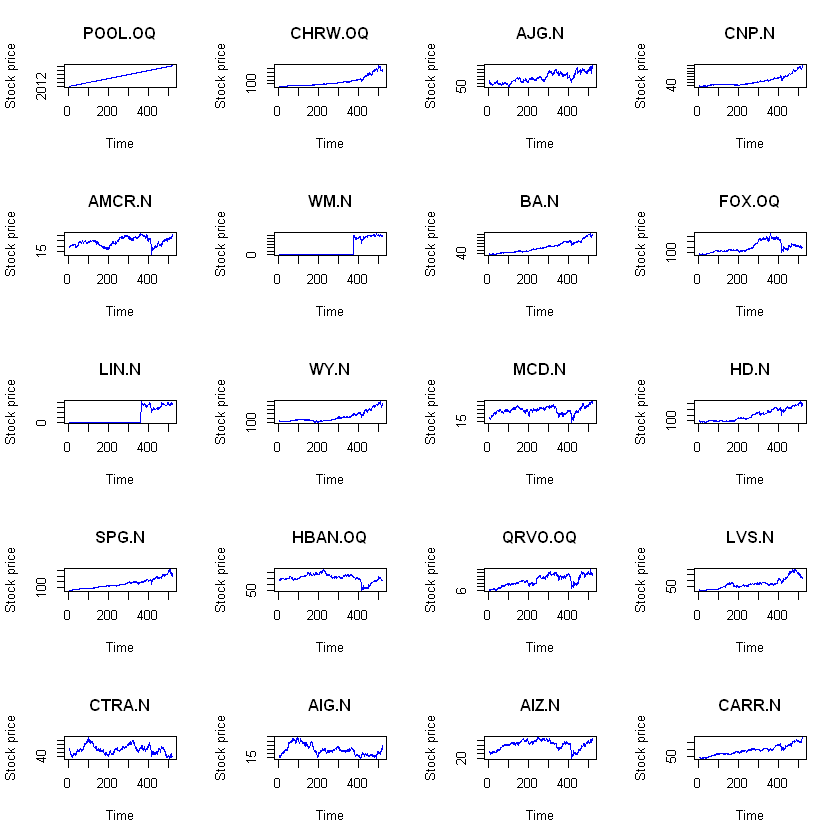

In [67]:
#Plot graphs of price evolution of S&P 500 stocks
PlotDF(SAPindata, SAPnames)

# 3) Frequency analysis

In [19]:
# function adds one to the counter corresponding to a certain pattern
Hashing = function(char, hs){
    if (hs$char == NULL){
        hs$char = 1
    }
    else{
        hs$char = hs$char + 1
    }
    print(hs$char)
}

In [60]:
#function counts the occurences of all patterns of 0 and 1 in the series RW
#len - the longest patterns we want to count
FA = function(RW, len){
    N = length(RW)
    seq = hash()
    vecseq = vector(length = len)
    dat = data.frame()
    datnam = data.frame()
    for (i in 1:N){
        vecseq = Shift(vecseq, RW[i])
        for (j in 2:len){
            if (i>=j){
                s = vecseq[(len-j+1):len]
                schar = paste(s, collapse = "")
                if (is.null(seq[[schar]])){
                    seq[[schar]] = 1
                }
                else{
                    seq[[schar]] = seq[[schar]] + 1
                }
            }
            else{
            }
        }
    }
    bin = c(0,1)
    par(mfrow=c(2,1))
    for (k in 4:len){
        vekt = permutations(n = 2, r=k, v=bin, repeats.allowed=T)
        Nrw = nrow(vekt)
        freq = vector(length = Nrw)
        names = vector(length = Nrw)
        
        for (l in 1:Nrw){
            chr = paste(vekt[l,], collapse = "")
            if (is.null(seq[[chr]])){
                seq[[chr]] = 0
            }
            freq[l] = seq[[chr]]
            names[l] = chr
        }
        print(freq)
        
        avgval = (N-(k-1))/Nrw
        barplot(freq, col = "orange", names.arg = names, las = 2, cex.names = 0.6, cex.axis = 0.6, xlab = " Patern", ylab = "Proportion")
        abline(h=avgval)
    }
    print(dat)
}

In [26]:
head(SAPindata)

POOL.OQ CHRW.OQ AJG.N CNP.N WM.N  BA.N  LIN.N  WY.N     MCD.N HD.N  ... NRG.N
1 36.95   65.12   36.00 19.55 35.11 73.59 113.94 20.47589 98.62 50.62 ... 15.18
2 38.18   64.13   34.89 19.17 35.14 72.92 112.03 19.74291 96.97 50.96 ... 14.58
3 37.23   66.52   36.40 19.53 35.96 73.55 113.69 19.97137 95.94 51.46 ... 15.39
4 37.90   59.02   37.58 20.05 34.25 77.27 116.47 19.84762 97.38 51.95 ... 16.63
5 36.10   60.62   36.76 20.05 33.97 75.84 114.72 19.01945 95.87 51.96 ... 15.47
6 36.71   60.81   35.85 20.24 33.48 73.56 111.68 19.10512 91.90 50.34 ... 16.29
  MKTX.OQ LMT.N DLR.N SCHW.N DXC.N     SNPS.OQ J.N   SIVB.OQ AVY.N
1 37.45   90.15 73.45 14.25  10.695306 30.21   43.77 63.63   29.86
2 35.71   89.30 72.79 13.87   9.846241 29.85   42.90 61.37   30.32
3 36.41   90.84 73.63 14.02   9.933698 29.61   43.18 63.23   31.07
4 34.75   91.30 74.97 14.31  10.378273 30.32   44.60 65.70   32.39
5 33.12   87.83 73.92 13.53   9.915478 29.67   39.55 62.33   31.45
6 32.08   85.21 73.34 13.11   9.879037 29.09   38.86 62.52   30.73

 [1] 21 23 25 26 25 45 19 48 23 28 45 40 26 40 47 37
 [1] 10 11 10 13  7 18  6 20  9 16 22 23  8 11 28 20 11 12 15 13 18 27 12 28 14
[26] 12 23 17 18 29 19 17
data frame with 0 columns and 0 rows


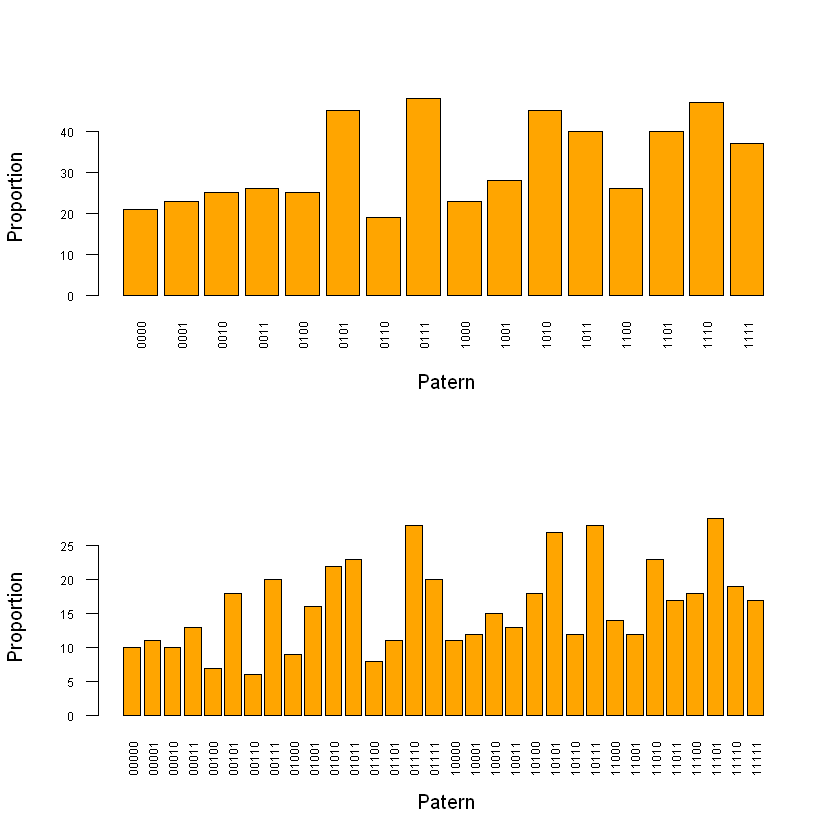

In [61]:
#example of the function call for patterns of length 4 and 5
pom = Binary(SAPindata$AIZ.N)
FA(pom, 5)

# Fama & French Asset Pricing approach

This code is motivated by Loh 2012 Streaks in Earnings Surprises and the Cross-Section of Stock Returns.

## Data
All S&P500 constituents without those who had negative book value during the time period observed. 
We observe data from July 2002 to March 2022
 - Fama French coeficients from https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
 - EPS and EPS 12month consensus forecast from Eikon Ref
 - Stock prices from Eikon Ref
 
### SURPS
 = EPS - the concensus forecast in the same time period
 
### Returns
 Returns = simple monthly return Pt - Pt-1/Pt
 - because that is the way how Fama and French calculates the returns used in the regresion
 - with other returns it does not make sense


1) We evaluate if the SURP of every stock in every time is positive/negative and is in the strike/reversal higher probability/lower probability. 0 SURPS are omited.
2) In every quarter, we calculate 4 average monthly returns according to the characteristics of SURP.
3) We do the same thing for all 3 months following the SURP
4) we obtain 4 monthly time series of returns 
5) We run 4 3-factor Fama French regresions using those time series and Fama French coeficients

## Results

1) SURP quintiles, streak/ reversal

2) Positive/negative SURP, streak/ reversal


3) Positive/negative SURP, high/low expected probability of price increase (novel approach)
     - all paterns
     - only pbs up to 0,55 and less than 0,45
     - only pbs up to 0,6 and less than 0,4
     
    In all three cases, there is a difference between intercept of high and low probabilities

 

 

 

In [1]:
library("stats")
#install.packages("readxl")
library("readxl")
#install.packages("writexl")
library("writexl")
#install.packages("stringr")
library("stringr")
#install.packages("openxlx")
library("openxlx")

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'readxl' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'writexl' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"package 'writexl' was built under R version 3.6.3"Warning mess

ERROR: Error in library("openxlx"): there is no package called 'openxlx'


### Data dowload and preparation

In [114]:

#Fama french 3factor data from https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

fff = read.csv("C:\\Users\\asus\\Desktop\\DP4\\DP\\DATA\\Fama\\ThreeFactorM.csv")
#fffdata10 = fff[1030:1149,]
fffdata20 = fff[913:1149,]


# downloading 5-factor Fama French data from July 2002 to March 2022 as for the three factor in the previous section
ff5 = read.csv("C:\\Users\\asus\\Desktop\\DP4\\DP\\DATA\\Fama\\FiveFactorM.csv")
ff5data20 = ff5[469:705,]
head(ff5data20)

[1] 5

Date   Mkt.RF   SMB      HML      RMW      CMA      RF      
469 200207    -8.18    -6.42    -3.86     3.76    -1.02     0.15
470 200208     0.50    -1.32     3.31     1.34    -1.42     0.14
471 200209   -10.35     3.10     1.44     3.26    -2.22     0.14
472 200210     7.84    -4.30    -3.95    -3.36     0.78     0.14
473 200211     5.96     2.95    -1.27    -9.19     5.15     0.12
474 200212    -5.76     0.64     2.13     6.27    -1.69     0.11

In [3]:
#Downloading quarterly EPS and consensus forecast data

EPSdata20 = read_xlsx("C:\\Users\\asus\\Desktop\\DP4\\DP\\DATA\\EPSall20BV.xlsx")
EPSdata20 = EPSdata20[1:(nrow(EPSdata20)-1),]
EPSdata20[is.na(EPSdata20)] = 0
#head(EPSdata20)


New names:
* `DXC TECHNOLOGY - EARNINGS PER SHR` -> `DXC TECHNOLOGY - EARNINGS PER SHR...886`
* `DXC TECHNOLOGY - EARNINGS PER SHR` -> `DXC TECHNOLOGY - EARNINGS PER SHR...887`
* ALPHABET -> ALPHABET...888
* ALPHABET -> ALPHABET...889


In [4]:
#Here we calculate quarterly SURP data using the EPS observations and the EPS consensus forecast data
SURPdata20 = data.frame(EPSdata20[1])
for (i in seq(from=2, to=893, by=2)){
    v = EPSdata20[,i] - EPSdata20[,i+1]
    SURPdata20 = cbind(SURPdata20, v)
}
DFSURP20 = SURPdata20
DFSURP20[is.na(DFSURP20)] = 0
DFSURP20 = DFSURP20[-80,]
head(DFSURP20)

Name    ABBOTT LABORATORIES - EARNINGS PER SHR ABIOMED - EARNINGS PER SHR
1 Q2 2002 -1.62                                  1.24                      
2 Q3 2002 -1.46                                  1.19                      
3 Q4 2002 -1.48                                  1.14                      
4 Q1 2003 -1.46                                  0.94                      
5 Q2 2003 -1.55                                  0.96                      
6 Q3 2003 -1.73                                  0.92                      
  INTERNATIONAL BUS.MCHS. - EARNINGS PER SHR ADOBE (NAS) - EARNINGS PER SHR
1 -0.52                                      -0.18                         
2 -1.28                                      -0.12                         
3 -1.13                                      -0.12                         
4 -1.49                                      -0.13                         
5 -1.55                                      -0.16                         
6 -1.01                                      -0.14                         
  ALEXANDRIA RLST.EQTIES. - EARNINGS PER SHR
1 -0.03                                     
2 -0.36                                     
3 -0.44                                     
4 -1.43                                     
5 -0.34                                     
6 -0.37                                     
  AIR PRDS.& CHEMS. - EARNINGS PER SHR ALASKA AIR GROUP - EARNINGS PER SHR
1 -0.47                                -0.08                              
2 -0.56                                -0.24                              
3 -0.41                                -0.15                              
4 -0.39                                 0.08                              
5 -0.35                                 0.43                              
6 -0.92                                 0.09                              
  BOSTON PROPERTIES - EARNINGS PER SHR ALLSTATE ORD SHS - EARNINGS PER SHR ...
1 -0.50                                -1.33                               ...
2 -0.45                                -1.29                               ...
3 -0.31                                -1.47                               ...
4 -0.33                                -1.32                               ...
5  2.33                                -1.23                               ...
6  2.38                                -1.09                               ...
  FORTIVE - EARNINGS PER SHR S&P GLOBAL - EARNINGS PER SHR
1 0                          -0.55                        
2 0                          -0.54                        
3 0                          -0.48                        
4 0                          -0.16                        
5 0                          -0.19                        
6 0                          -0.18                        
  ALPHABET A - EARNINGS PER SHR WELLTOWER - EARNINGS PER SHR
1 0                              1.48                       
2 0                              1.46                       
3 0                              1.42                       
4 0                              1.47                       
5 0                              1.53                       
6 0                             -0.09                       
  HEWLETT PACKARD ENTER. - EARNINGS PER SHR PAYPAL HOLDINGS - EARNINGS PER SHR
1 0                                         0                                 
2 0                                         0                                 
3 0                                         0                                 
4 0                                         0                                 
5 0                                         0                                 
6 0                                         0                                 
  DXC TECHNOLOGY - EARNINGS PER SHR...886 ALPHABET...888
1 -2.11                                   0             
2 -2.08                               

In [5]:
# Here we dowload  the monthly returns data and calculates the monthly returns
# We use only Returnsdatadiff20 in the following work due to the definition of FF coeficients

Pricesdata20 = read_xlsx("C:\\Users\\asus\\Desktop\\DP4\\DP\\DATA\\Returns20BV.xlsx")
Pricesdata20[is.na(Pricesdata20)] = 0
Returnsdata20 = Pricesdata20[-nrow(Pricesdata20),]
Returnsdatalog20 = Pricesdata20[-nrow(Pricesdata20),]
Returnsdatadiff20 = Pricesdata20[-nrow(Pricesdata20),]
for (i in 2:ncol(Pricesdata20)){
    for (j in 2:nrow(Pricesdata20)-1){
        #Returnsdata20[j,i] = (as.numeric(Pricesdata20[j+1,i])) / (as.numeric(Pricesdata20[j,i]))
        #Returnsdatalog20[j,i] = log(as.numeric(Pricesdata20[j+1,i])) - log(as.numeric(Pricesdata20[j,i]))
        Returnsdatadiff20[j,i] = (((as.numeric(Pricesdata20[j+1,i])) - (as.numeric(Pricesdata20[j,i])))  / (as.numeric(Pricesdata20[j,i])))*100
    }
}


# 1) Evaluation of SURPS quintiles

In this part, we replicate the work of Loh(2012) and test how overpriced or underpriced are the stocks in different quintiles and Streaks/reversals

In [78]:
#Sorts SURPs to quintiles and reversals and streaks in every time period
SortSurpQ = function(row, SURP, Strx){
    
    Ncol = ncol(SURP)
    
    VQ1S = vector(length = 0)
    VQ2S = vector(length = 0)
    VQ3S = vector(length = 0)
    VQ4S = vector(length = 0)
    VQ5S = vector(length = 0)
    VQ1R = vector(length = 0)
    VQ2R = vector(length = 0)
    VQ3R = vector(length = 0)
    VQ4R = vector(length = 0)
    VQ5R = vector(length = 0)
    
    RW = SURP[row, 2:Ncol]
    
    Q = as.numeric(quantile(RW, probs = seq(0, 1, 1/5))) 
   
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    Q5 = 0
    
    for (i in 2:Ncol){
        
        if (SURP[row, i] < Q[2]){
            Q1 = Q1+1
            if (Strx[row,i] == 1) {
                VQ1S = append(VQ1S, i)
            }
            if (Strx[row,i] == 2) {
                VQ1R = append(VQ1R, i)
            }
        }
        if (SURP[row,i] >= Q[2] & SURP[row,i] < Q[3]){
            Q2 = Q2+1
            if (Strx[row,i] == 1) {
                VQ2S = append(VQ2S, i)
            }
            if (Strx[row,i] == 2) {
                VQ2R = append(VQ2R, i)
            }
        }
        if (SURP[row,i] >= Q[3] & SURP[row,i] < Q[4]){
            Q3 = Q3+1
            if (Strx[row,i] == 1) {
                VQ3S = append(VQ3S, i)
            }
            if (Strx[row,i] == 2) {
                VQ3R = append(VQ3R, i)
            }
        }
        if (SURP[row,i] >= Q[4] & SURP[row,i] < Q[5]){
            Q4 = Q4+1
            if (Strx[row,i] == 1) {
                VQ4S = append(VQ4S, i)
            }
            if (Strx[row,i] == 2) {
                VQ4R = append(VQ4R, i)
            }
        }
        if (SURP[row,i] >= Q[5]){
            Q5 = Q5+1
            if (Strx[row,i] == 1) {
                VQ5S = append(VQ5S, i)
            }
            if (Strx[row,i] == 2) {
                VQ5R = append(VQ5R, i)
            }
        }
    }

    
    V = list()
    V[[1]] = VQ1S
    V[[2]] = VQ2S
    V[[3]] = VQ3S
    V[[4]] = VQ4S
    V[[5]] = VQ5S
    V[[6]] = VQ1R 
    V[[7]] = VQ2R
    V[[8]] = VQ3R 
    V[[9]] = VQ4R
    V[[10]] = VQ5R
  
    
    return(V)
}

In [39]:
#creates a dataframe where: 0- nothing 1- streak 2- reversal

StreaksQ = function(SURP){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    StrDF = SURP
    for (i in 1:Ncol){
        seq = 0
        prev = -1
        prevseq = -1
        for (j in 1:Nrow){
            StrDF[j,i] = 0
            act = Sig01(SURP[j,i])
            prevseq = seq
            if (act == prev){
                seq = 1
            } 
            else{seq = 0}
    #streak
            if (seq==1 ){
                StrDF[j,i] = 1
            }
          
    #reversal
            if (seq==0  & prevseq==1){
                StrDF[j,i] = 2
            }

            
            prev = act
        
        }
    }
    return(StrDF)
}

In [74]:
#function creates TS of returns corresponding to [[1]] - Q1 streaks [[2]]- Q2 streaks... [[6]]- Q1 reversals [[7]]- Q2 reversals...
EWQReturns = function(SURP, returns){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    SQ1Ret = vector(length = 0)
    SQ2Ret = vector(length = 0)
    SQ3Ret = vector(length = 0)
    SQ4Ret = vector(length = 0)
    SQ5Ret = vector(length = 0)
    RQ1Ret = vector(length = 0)
    RQ2Ret = vector(length = 0)
    RQ3Ret = vector(length = 0)
    RQ4Ret = vector(length = 0)
    RQ5Ret = vector(length = 0)
 
    
    StrDF = StreaksQ(SURP)
    
    for (i in 1:Nrow){
        ReturnsiM1 = returns[3*(i-1)+2,]
        ReturnsiM2 = returns[3*(i-1)+3,]
        ReturnsiM3 = returns[3*(i-1)+4,]
        
        idxs = SortSurpQ(i, SURP, StrDF)
        
        if(length(idxs[[1]])>0){
            idxSQ1 = idxs[[1]]
            SQ1iM1 = na.omit(as.numeric(ReturnsiM1[idxSQ1]))
            SQ1Ret = append(SQ1Ret, mean(SQ1iM1[is.finite(SQ1iM1)]))
           
            SQ1iM2 = na.omit(as.numeric(ReturnsiM2[idxSQ1]))
            SQ1Ret = append(SQ1Ret, mean(SQ1iM2[is.finite(SQ1iM2)]))
            
            SQ1iM3 = na.omit(as.numeric(ReturnsiM3[idxSQ1]))
            SQ1Ret = append(SQ1Ret, mean(SQ1iM3[is.finite(SQ1iM3)]))
        }
        else{
            for (j in 1:3){SQ1Ret = append(SQ1Ret, 0)}
        }
        
        if(length(idxs[[2]])>0){
            idxSQ2 = idxs[[2]]
            SQ2iM1 = na.omit(as.numeric(ReturnsiM1[idxSQ2]))
            SQ2Ret = append(SQ2Ret, mean(SQ2iM1[is.finite(SQ2iM1)]))
           
            SQ2iM2 = na.omit(as.numeric(ReturnsiM2[idxSQ2]))
            SQ2Ret = append(SQ2Ret, mean(SQ2iM2[is.finite(SQ2iM2)]))
            
            SQ2iM3 = na.omit(as.numeric(ReturnsiM3[idxSQ2]))
            SQ2Ret = append(SQ2Ret, mean(SQ2iM3[is.finite(SQ2iM3)]))
        }
        else{
            for (j in 1:3){SQ2Ret = append(SQ2Ret, 0)}
        }
        
        if(length(idxs[[3]])>0){
            idxSQ3 = idxs[[3]]
            SQ3iM1 = na.omit(as.numeric(ReturnsiM1[idxSQ3]))
            SQ3Ret = append(SQ3Ret, mean(SQ3iM1[is.finite(SQ3iM1)]))
           
            SQ3iM2 = na.omit(as.numeric(ReturnsiM2[idxSQ3]))
            SQ3Ret = append(SQ3Ret, mean(SQ3iM2[is.finite(SQ3iM2)]))
            
            SQ3iM3 = na.omit(as.numeric(ReturnsiM3[idxSQ3]))
            SQ3Ret = append(SQ3Ret, mean(SQ3iM3[is.finite(SQ3iM3)]))
        }
        else{
            for (j in 1:3){SQ3Ret = append(SQ3Ret, 0)}
        }
        
        if(length(idxs[[4]])>0){
            idxSQ4 = idxs[[4]]
            SQ4iM1 = na.omit(as.numeric(ReturnsiM1[idxSQ4]))
            SQ4Ret = append(SQ4Ret, mean(SQ4iM1[is.finite(SQ4iM1)]))
           
            SQ4iM2 = na.omit(as.numeric(ReturnsiM2[idxSQ4]))
            SQ4Ret = append(SQ4Ret, mean(SQ4iM2[is.finite(SQ4iM2)]))
            
            SQ4iM3 = na.omit(as.numeric(ReturnsiM3[idxSQ4]))
            SQ4Ret = append(SQ4Ret, mean(SQ4iM3[is.finite(SQ4iM3)]))
        }
        else{
            for (j in 1:3){SQ4Ret = append(SQ4Ret, 0)}
        }
        
        if(length(idxs[[5]])>0){
            idxSQ5 = idxs[[5]]
            SQ5iM1 = na.omit(as.numeric(ReturnsiM1[idxSQ5]))
            SQ5Ret = append(SQ5Ret, mean(SQ5iM1[is.finite(SQ5iM1)]))
           
            SQ5iM2 = na.omit(as.numeric(ReturnsiM2[idxSQ5]))
            SQ5Ret = append(SQ5Ret, mean(SQ5iM2[is.finite(SQ5iM2)]))
            
            SQ5iM3 = na.omit(as.numeric(ReturnsiM3[idxSQ5]))
            SQ5Ret = append(SQ5Ret, mean(SQ5iM3[is.finite(SQ5iM3)]))
        }
        else{
            for (j in 1:3){SQ5Ret = append(SQ5Ret, 0)}
        }
         
        if(length(idxs[[1]])>0){
            idxRQ1 = idxs[[1]]
            RQ1iM1 = na.omit(as.numeric(ReturnsiM1[idxRQ1]))
            RQ1Ret = append(RQ1Ret, mean(RQ1iM1[is.finite(RQ1iM1)]))
           
            RQ1iM2 = na.omit(as.numeric(ReturnsiM2[idxRQ1]))
            RQ1Ret = append(RQ1Ret, mean(RQ1iM2[is.finite(RQ1iM2)]))
            
            RQ1iM3 = na.omit(as.numeric(ReturnsiM3[idxRQ1]))
            RQ1Ret = append(RQ1Ret, mean(RQ1iM3[is.finite(RQ1iM3)]))
        }
        else{
            for (j in 1:3){RQ1Ret = append(RQ1Ret, 0)}
        }
        
        if(length(idxs[[2]])>0){
            idxRQ2 = idxs[[2]]
            RQ2iM1 = na.omit(as.numeric(ReturnsiM1[idxRQ2]))
            RQ2Ret = append(RQ2Ret, mean(RQ2iM1[is.finite(RQ2iM1)]))
           
            RQ2iM2 = na.omit(as.numeric(ReturnsiM2[idxRQ2]))
            RQ2Ret = append(RQ2Ret, mean(RQ2iM2[is.finite(RQ2iM2)]))
            
            RQ2iM3 = na.omit(as.numeric(ReturnsiM3[idxRQ2]))
            RQ2Ret = append(RQ2Ret, mean(RQ2iM3[is.finite(RQ2iM3)]))
        }
        else{
            for (j in 1:3){RQ2Ret = append(RQ2Ret, 0)}
        }
        
        if(length(idxs[[3]])>0){
            idxRQ3 = idxs[[3]]
            RQ3iM1 = na.omit(as.numeric(ReturnsiM1[idxRQ3]))
            RQ3Ret = append(RQ3Ret, mean(RQ3iM1[is.finite(RQ3iM1)]))
           
            RQ3iM2 = na.omit(as.numeric(ReturnsiM2[idxRQ3]))
            RQ3Ret = append(RQ3Ret, mean(RQ3iM2[is.finite(RQ3iM2)]))
            
            RQ3iM3 = na.omit(as.numeric(ReturnsiM3[idxRQ3]))
            RQ3Ret = append(RQ3Ret, mean(RQ3iM3[is.finite(RQ3iM3)]))
        }
        else{
            for (j in 1:3){RQ3Ret = append(RQ3Ret, 0)}
        }
        
        if(length(idxs[[4]])>0){
            idxRQ4 = idxs[[4]]
            RQ4iM1 = na.omit(as.numeric(ReturnsiM1[idxRQ4]))
            RQ4Ret = append(RQ4Ret, mean(RQ4iM1[is.finite(RQ4iM1)]))
           
            RQ4iM2 = na.omit(as.numeric(ReturnsiM2[idxRQ4]))
            RQ4Ret = append(RQ4Ret, mean(RQ4iM2[is.finite(RQ4iM2)]))
            
            RQ4iM3 = na.omit(as.numeric(ReturnsiM3[idxRQ4]))
            RQ4Ret = append(RQ4Ret, mean(RQ4iM3[is.finite(RQ4iM3)]))
        }
        else{
            for (j in 1:3){RQ4Ret = append(RQ4Ret, 0)}
        }
        
        if(length(idxs[[5]])>0){
            idxRQ5 = idxs[[5]]
            RQ5iM1 = na.omit(as.numeric(ReturnsiM1[idxRQ5]))
            RQ5Ret = append(RQ5Ret, mean(RQ5iM1[is.finite(RQ5iM1)]))
           
            RQ5iM2 = na.omit(as.numeric(ReturnsiM2[idxRQ5]))
            RQ5Ret = append(RQ5Ret, mean(RQ5iM2[is.finite(RQ5iM2)]))
            
            RQ5iM3 = na.omit(as.numeric(ReturnsiM3[idxRQ5]))
            RQ5Ret = append(RQ5Ret, mean(RQ5iM3[is.finite(RQ5iM3)]))
        }
        else{
            for (j in 1:3){RQ5Ret = append(RQ5Ret, 0)}
        }
          
    }
    EWRet = list()
    EWRet[[1]] = SQ1Ret
    EWRet[[2]] = SQ2Ret
    EWRet[[3]] = SQ3Ret
    EWRet[[4]] = SQ4Ret
    EWRet[[5]] = SQ5Ret
    EWRet[[6]] = RQ1Ret
    EWRet[[7]] = RQ2Ret
    EWRet[[8]] = RQ3Ret
    EWRet[[9]] = RQ4Ret
    EWRet[[10]] = RQ5Ret
    

    
    return(EWRet)
}

### 3-factor model

In [112]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFFQ = function(fff, SURP, returns){
    R = EWQReturns(SURP, returns)
   
    
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
    fff = cbind(fff, R[[5]])
    fff = cbind(fff, R[[6]])
    fff = cbind(fff, R[[7]])
    fff = cbind(fff, R[[8]])
    fff = cbind(fff, R[[9]])
    fff = cbind(fff, R[[10]])

   
   
    colnames(fff)[6] = "RetSQ1"
    colnames(fff)[7] = "RetSQ2"
    colnames(fff)[8] = "RetSQ3"
    colnames(fff)[9] = "RetSQ4"
    colnames(fff)[10] = "RetSQ5"
    colnames(fff)[11] = "RetRQ1"
    colnames(fff)[12] = "RetRQ2"
    colnames(fff)[13] = "RetRQ3"
    colnames(fff)[14] = "RetRQ4"
    colnames(fff)[15] = "RetRQ5"
    
    DF1 = Prepare(fff)
#return - risk free return
    DF1$RetSQ1RF = DF1$RetSQ1 - DF1$RF
    DF1$RetSQ2RF = DF1$RetSQ2 - DF1$RF
    DF1$RetSQ3RF = DF1$RetSQ3 - DF1$RF
    DF1$RetSQ4RF = DF1$RetSQ4 - DF1$RF
    DF1$RetSQ5RF = DF1$RetSQ5 - DF1$RF
    DF1$RetRQ1RF = DF1$RetRQ1 - DF1$RF
    DF1$RetRQ2RF = DF1$RetRQ2 - DF1$RF
    DF1$RetRQ3RF = DF1$RetRQ3 - DF1$RF
    DF1$RetRQ4RF = DF1$RetRQ4 - DF1$RF
    DF1$RetRQ5RF = DF1$RetRQ5 - DF1$RF
  
   
    
    return(DF1)
}

In [80]:
#FINAL CALL 3-Factor
DF1 = DFFQ(fffdata20, DFSURP20, Returnsdatadiff20)
DF2 = DF1[-(1:10),]
head(DF2)

Date   Mkt.RF SMB  HML   RF   RetSQ1     RetSQ2    RetSQ3     RetSQ4   
923 200305  6.05  4.71  0.53 0.09  8.7380567  7.045638  6.0508250  6.981050
924 200306  1.42  1.74  0.19 0.10  2.3694071  2.353201  3.2780288  3.399029
925 200307  2.35  5.11 -1.19 0.07 -0.3594696  1.525607  1.4992464  2.275452
926 200308  2.34  2.62  1.54 0.07  4.3539526  6.875388  7.2291749  8.781414
927 200309 -1.24  0.80  0.10 0.08  0.1532130 -1.009141 -0.7082627 -1.041530
928 200310  6.08  2.63  1.92 0.07  3.7400888  6.609677  5.5882609  8.290621
    RetSQ5    ... RetSQ1RF    RetSQ2RF  RetSQ3RF   RetSQ4RF  RetSQ5RF 
923 21.345187 ...  8.64805668  6.955638  5.9608250  6.891050 21.255187
924  2.229977 ...  2.26940706  2.253201  3.1780288  3.299029  2.129977
925  2.899250 ... -0.42946961  1.455607  1.4292464  2.205452  2.829250
926  6.297469 ...  4.28395264  6.805388  7.1591749  8.711414  6.227469
927  2.977838 ...  0.07321298 -1.089141 -0.7882627 -1.121530  2.897838
928  5.611767 ...  3.67008879  6.539677  5.5182609  8.220621  5.541767
    RetRQ1RF    RetRQ2RF  RetRQ3RF   RetRQ4RF  RetRQ5RF 
923  8.64805668  6.955638  5.9608250  6.891050 21.255187
924  2.26940706  2.253201  3.1780288  3.299029  2.129977
925 -0.42946961  1.455607  1.4292464  2.205452  2.829250
926  4.28395264  6.805388  7.1591749  8.711414  6.227469
927  0.07321298 -1.089141 -0.7882627 -1.121530  2.897838
928  3.67008879  6.539677  5.5182609  8.220621  5.541767

In [81]:
# 3-factor model for first, third and fifth quintile
OLSSQ1 = lm(RetSQ1RF ~ Mkt.RF + SMB + HML, data = DF1)
OLSSQ3 = lm(RetSQ3RF ~ Mkt.RF + SMB + HML, data = DF1)
OLSSQ5 = lm(RetSQ5RF ~  Mkt.RF + SMB + HML, data = DF1)

OLSRQ1 = lm(RetRQ1RF ~ Mkt.RF + SMB + HML, data = DF1)
OLSRQ3 = lm(RetRQ3RF ~ Mkt.RF + SMB + HML, data = DF1)
OLSRQ5 = lm(RetRQ5RF ~ Mkt.RF + SMB + HML, data = DF1)
summary(OLSSQ1)
summary(OLSSQ3)
summary(OLSSQ5)
summary(OLSRQ1)
summary(OLSRQ3)
summary(OLSRQ5)


Call:
lm(formula = RetSQ1RF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7970  -1.4034  -0.1931   1.0409  15.2814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.12825    0.18352   0.699  0.48537    
Mkt.RF       1.06677    0.04475  23.838  < 2e-16 ***
SMB          0.09906    0.07895   1.255  0.21088    
HML          0.18715    0.06236   3.001  0.00298 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.77 on 233 degrees of freedom
Multiple R-squared:  0.7568,	Adjusted R-squared:  0.7537 
F-statistic: 241.7 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetSQ3RF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4345 -1.1931 -0.0946  1.0821 11.3443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41229    0.16455   2.506   0.0129 *  
Mkt.RF       0.96890    0.04013  24.146   <2e-16 ***
SMB          0.12492    0.07079   1.765   0.0789 .  
HML          0.12837    0.05591   2.296   0.0226 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.484 on 233 degrees of freedom
Multiple R-squared:  0.7616,	Adjusted R-squared:  0.7586 
F-statistic: 248.2 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetSQ5RF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3344 -1.9366 -0.2865  1.4053 17.8508 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.68458    0.22415   3.054 0.002520 ** 
Mkt.RF       1.01238    0.05466  18.522  < 2e-16 ***
SMB          0.35651    0.09643   3.697 0.000272 ***
HML          0.40759    0.07617   5.351 2.09e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.383 on 233 degrees of freedom
Multiple R-squared:  0.6996,	Adjusted R-squared:  0.6958 
F-statistic: 180.9 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRQ1RF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7970  -1.4034  -0.1931   1.0409  15.2814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.12825    0.18352   0.699  0.48537    
Mkt.RF       1.06677    0.04475  23.838  < 2e-16 ***
SMB          0.09906    0.07895   1.255  0.21088    
HML          0.18715    0.06236   3.001  0.00298 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.77 on 233 degrees of freedom
Multiple R-squared:  0.7568,	Adjusted R-squared:  0.7537 
F-statistic: 241.7 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRQ3RF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4345 -1.1931 -0.0946  1.0821 11.3443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41229    0.16455   2.506   0.0129 *  
Mkt.RF       0.96890    0.04013  24.146   <2e-16 ***
SMB          0.12492    0.07079   1.765   0.0789 .  
HML          0.12837    0.05591   2.296   0.0226 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.484 on 233 degrees of freedom
Multiple R-squared:  0.7616,	Adjusted R-squared:  0.7586 
F-statistic: 248.2 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRQ5RF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3344 -1.9366 -0.2865  1.4053 17.8508 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.68458    0.22415   3.054 0.002520 ** 
Mkt.RF       1.01238    0.05466  18.522  < 2e-16 ***
SMB          0.35651    0.09643   3.697 0.000272 ***
HML          0.40759    0.07617   5.351 2.09e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.383 on 233 degrees of freedom
Multiple R-squared:  0.6996,	Adjusted R-squared:  0.6958 
F-statistic: 180.9 on 3 and 233 DF,  p-value: < 2.2e-16


## 5-Factor

In [115]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFF5Q = function(fff, SURP, returns){
    R = EWQReturns(SURP, returns)
   
    
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
    fff = cbind(fff, R[[5]])
    fff = cbind(fff, R[[6]])
    fff = cbind(fff, R[[7]])
    fff = cbind(fff, R[[8]])
    fff = cbind(fff, R[[9]])
    fff = cbind(fff, R[[10]])

   
   
    colnames(fff)[8] = "RetSQ1"
    colnames(fff)[9] = "RetSQ2"
    colnames(fff)[10] = "RetSQ3"
    colnames(fff)[11] = "RetSQ4"
    colnames(fff)[12] = "RetSQ5"
    colnames(fff)[13] = "RetRQ1"
    colnames(fff)[14] = "RetRQ2"
    colnames(fff)[15] = "RetRQ3"
    colnames(fff)[16] = "RetRQ4"
    colnames(fff)[17] = "RetRQ5"
    
    DF1 = Prepare(fff)
    
#return - risk free return
    DF1$RetSQ1RF = DF1$RetSQ1 - DF1$RF
    DF1$RetSQ2RF = DF1$RetSQ2 - DF1$RF
    DF1$RetSQ3RF = DF1$RetSQ3 - DF1$RF
    DF1$RetSQ4RF = DF1$RetSQ4 - DF1$RF
    DF1$RetSQ5RF = DF1$RetSQ5 - DF1$RF
    DF1$RetRQ1RF = DF1$RetRQ1 - DF1$RF
    DF1$RetRQ2RF = DF1$RetRQ2 - DF1$RF
    DF1$RetRQ3RF = DF1$RetRQ3 - DF1$RF
    DF1$RetRQ4RF = DF1$RetRQ4 - DF1$RF
    DF1$RetRQ5RF = DF1$RetRQ5 - DF1$RF
  
   
    
    return(DF1)
}

In [117]:
#FINAL CALL 5-factor
DF15Q = DFF5Q(ff5data20, DFSURP20, Returnsdatadiff20)
DF25Q = DF1[-(1:10),]
head(DF25Q)

Date   Mkt.RF SMB  HML   RMW   CMA   RF   RetSQ1     RetSQ2    RetSQ3    
479 200305  6.05  4.85  0.53 -7.02  3.02 0.09  8.7380567  7.045638  6.0508250
480 200306  1.42  1.66  0.19  0.44 -0.34 0.10  2.3694071  2.353201  3.2780288
481 200307  2.35  4.58 -1.19 -4.23  1.85 0.07 -0.3594696  1.525607  1.4992464
482 200308  2.34  2.52  1.54 -2.21  2.13 0.07  4.3539526  6.875388  7.2291749
483 200309 -1.24  0.55  0.10  1.06  0.34 0.08  0.1532130 -1.009141 -0.7082627
484 200310  6.08  2.67  1.92 -1.30  1.48 0.07  3.7400888  6.609677  5.5882609
    ... RetSQ1RF    RetSQ2RF  RetSQ3RF   RetSQ4RF  RetSQ5RF  RetRQ1RF   
479 ...  8.64805668  6.955638  5.9608250  6.891050 21.255187  8.64805668
480 ...  2.26940706  2.253201  3.1780288  3.299029  2.129977  2.26940706
481 ... -0.42946961  1.455607  1.4292464  2.205452  2.829250 -0.42946961
482 ...  4.28395264  6.805388  7.1591749  8.711414  6.227469  4.28395264
483 ...  0.07321298 -1.089141 -0.7882627 -1.121530  2.897838  0.07321298
484 ...  3.67008879  6.539677  5.5182609  8.220621  5.541767  3.67008879
    RetRQ2RF  RetRQ3RF   RetRQ4RF  RetRQ5RF 
479  6.955638  5.9608250  6.891050 21.255187
480  2.253201  3.1780288  3.299029  2.129977
481  1.455607  1.4292464  2.205452  2.829250
482  6.805388  7.1591749  8.711414  6.227469
483 -1.089141 -0.7882627 -1.121530  2.897838
484  6.539677  5.5182609  8.220621  5.541767

In [118]:
# 5-factor model for first, third and fifth quintile

OLSS5Q1 = lm(RetSQ1RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)
OLSS5Q3 = lm(RetSQ3RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)
OLSS5Q5 = lm(RetSQ5RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

OLSR5Q1 = lm(RetRQ1RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)
OLSR5Q3 = lm(RetRQ3RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)
OLSR5Q5 = lm(RetRQ5RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

summary(OLSS5Q1)
summary(OLSS5Q3)
summary(OLSS5Q5)
summary(OLSR5Q1)
summary(OLSR5Q3)
summary(OLSR5Q5)


Call:
lm(formula = RetSQ1RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0534  -1.4231  -0.2957   1.1417  14.5859 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.189073   0.184099   1.027  0.30549    
Mkt.RF       1.045770   0.045568  22.950  < 2e-16 ***
SMB          0.100954   0.080971   1.247  0.21374    
HML          0.295391   0.073818   4.002 8.48e-05 ***
RMW          0.007699   0.098511   0.078  0.93777    
CMA         -0.446520   0.124984  -3.573  0.00043 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.702 on 231 degrees of freedom
Multiple R-squared:  0.7705,	Adjusted R-squared:  0.7655 
F-statistic: 155.1 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetSQ3RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3817 -1.4254 -0.1208  1.0736 10.7526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43415    0.16550   2.623  0.00929 ** 
Mkt.RF       0.95856    0.04096  23.400  < 2e-16 ***
SMB          0.14621    0.07279   2.009  0.04573 *  
HML          0.19779    0.06636   2.981  0.00318 ** 
RMW          0.07753    0.08856   0.876  0.38220    
CMA         -0.34766    0.11236  -3.094  0.00222 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.429 on 231 degrees of freedom
Multiple R-squared:  0.7739,	Adjusted R-squared:  0.769 
F-statistic: 158.1 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetSQ5RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

Residuals:
   Min     1Q Median     3Q    Max 
-7.477 -1.812 -0.360  1.573 17.069 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.75048    0.23050   3.256  0.00130 ** 
Mkt.RF       0.98927    0.05705  17.340  < 2e-16 ***
SMB          0.31639    0.10138   3.121  0.00203 ** 
HML          0.38158    0.09242   4.129  5.1e-05 ***
RMW         -0.15642    0.12334  -1.268  0.20601    
CMA         -0.07751    0.15649  -0.495  0.62086    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.384 on 231 degrees of freedom
Multiple R-squared:  0.7022,	Adjusted R-squared:  0.6957 
F-statistic: 108.9 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRQ1RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0534  -1.4231  -0.2957   1.1417  14.5859 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.189073   0.184099   1.027  0.30549    
Mkt.RF       1.045770   0.045568  22.950  < 2e-16 ***
SMB          0.100954   0.080971   1.247  0.21374    
HML          0.295391   0.073818   4.002 8.48e-05 ***
RMW          0.007699   0.098511   0.078  0.93777    
CMA         -0.446520   0.124984  -3.573  0.00043 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.702 on 231 degrees of freedom
Multiple R-squared:  0.7705,	Adjusted R-squared:  0.7655 
F-statistic: 155.1 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRQ3RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3817 -1.4254 -0.1208  1.0736 10.7526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43415    0.16550   2.623  0.00929 ** 
Mkt.RF       0.95856    0.04096  23.400  < 2e-16 ***
SMB          0.14621    0.07279   2.009  0.04573 *  
HML          0.19779    0.06636   2.981  0.00318 ** 
RMW          0.07753    0.08856   0.876  0.38220    
CMA         -0.34766    0.11236  -3.094  0.00222 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.429 on 231 degrees of freedom
Multiple R-squared:  0.7739,	Adjusted R-squared:  0.769 
F-statistic: 158.1 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRQ5RF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF15Q)

Residuals:
   Min     1Q Median     3Q    Max 
-7.477 -1.812 -0.360  1.573 17.069 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.75048    0.23050   3.256  0.00130 ** 
Mkt.RF       0.98927    0.05705  17.340  < 2e-16 ***
SMB          0.31639    0.10138   3.121  0.00203 ** 
HML          0.38158    0.09242   4.129  5.1e-05 ***
RMW         -0.15642    0.12334  -1.268  0.20601    
CMA         -0.07751    0.15649  -0.495  0.62086    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.384 on 231 degrees of freedom
Multiple R-squared:  0.7022,	Adjusted R-squared:  0.6957 
F-statistic: 108.9 on 5 and 231 DF,  p-value: < 2.2e-16


# 2) Evaluation of SURPS positive/negative

In this part, we replicate the work of Loh(2012) and test how overpriced or underpriced are the stocks in positive/negative, Streaks/reversals

In [9]:
#Sorts SURPs to positive and negative ones and positive and negative reversals and streaks in every time period
SortSurp = function(row, SURP, Strx){
    Ncol = ncol(SURP)
    VposS = vector(length = 0)
    VnegS = vector(length = 0)
    VposR = vector(length = 0)
    VnegR = vector(length = 0)

    for (i in 2:Ncol){
        if (SURP[row,i] > 0){
            if (Strx[row,i] == 1) {
                VposS = append(VposS, i)
            }
            if (Strx[row,i] == 11) {
                VposR = append(VposR, i)
            }
        }
        
        if (SURP[row,i] <= 0){
            if (Strx[row,i] == 2) {
                VnegS = append(VnegS, i)
            }
            if (Strx[row,i] == 22) {
                VnegR = append(VnegR, i)
            }
        }
    }
    V = list()
    V[[1]] = VposS
    V[[2]] = VnegS
    V[[3]] = VposR 
    V[[4]] = VnegR
  
    
    return(V)
}

In [10]:
#evaluate whether is a value positive or negative
Sig01 = function(s){
    if (s>0){
        sig = 1
    }
    if (s<=0){ 
        sig = 0
    }

    return(sig)
}

In [11]:
#creates a dataframe where: 0- nothing 1- positive streak 11- positive reversal 2- negative streak 22- negative reversal

Streaks = function(SURP){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    StrDF = SURP
    for (i in 1:Ncol){
        seq = 0
        prev = -1
        prevseq = -1
        for (j in 1:Nrow){
            StrDF[j,i] = 0
            act = Sig01(SURP[j,i])
            prevseq = seq
            if (act == prev){
                seq = 1
            } 
            else{seq = 0}
            #positive streak
            if (seq==1 & act==1){
                StrDF[j,i] = 1
            }
            #negative streak
            if (seq==1 & act==0){
                StrDF[j,i] = 2
            }
            #positive reversal
            if (seq==0 & act==1 & prevseq==1){
                StrDF[j,i] = 11
            }
            #negative reversal
            if (seq==0 & act==0 & prevseq==1){
                StrDF[j,i] = 22
            }
            
            prev = act
        
        }
    }
    return(StrDF)
}

In [13]:
#function creates TS of returns corresponding to [[1]] - positive streaks [[2]]- negative streaks [[3]]- positive reversals [[4]]- negative reversals
EWReturns = function(SURP, returns){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    SPosRet = vector(length = 0)
    SNegRet = vector(length = 0)
    RPosRet = vector(length = 0)
    RNegRet = vector(length = 0)
 
    
    StrDF = Streaks(SURP)
    
    for (i in 1:Nrow){
        #print(returns[3*(i-1)+2,1])
        ReturnsiM1 = returns[3*(i-1)+2,]
        ReturnsiM2 = returns[3*(i-1)+3,]
        ReturnsiM3 = returns[3*(i-1)+4,]
        
        idxs = SortSurp(i, SURP, StrDF)
        
        if(length(idxs[[1]])>0){
            idxSpos = idxs[[1]]
            SPosiM1 = na.omit(as.numeric(ReturnsiM1[idxSpos]))
            SPosRet = append(SPosRet, mean(SPosiM1[is.finite(SPosiM1)]))
           
            SPosiM2 = na.omit(as.numeric(ReturnsiM2[idxSpos]))
            SPosRet = append(SPosRet, mean(SPosiM2[is.finite(SPosiM2)]))
            
            SPosiM3 = na.omit(as.numeric(ReturnsiM3[idxSpos]))
            SPosRet = append(SPosRet, mean(SPosiM3[is.finite(SPosiM3)]))
        }
        else{
            for (j in 1:3){SPosRet = append(SPosRet, 0)}
        }
        
        if(length(idxs[[2]])>0){
            idxSneg = idxs[[2]]
            SNegiM1 = na.omit(as.numeric(ReturnsiM1[idxSneg]))
            SNegRet = append(SNegRet, mean(SNegiM1[is.finite(SNegiM1)]))
            
            SNegiM2 = na.omit(as.numeric(ReturnsiM2[idxSneg]))
            SNegRet = append(SNegRet, mean(SNegiM2[is.finite(SNegiM2)]))
            
            SNegiM3 = na.omit(as.numeric(ReturnsiM3[idxSneg]))
            SNegRet = append(SNegRet, mean(SNegiM3[is.finite(SNegiM3)]))
        }
        else{
            for (j in 1:3){SNegRet = append(SNegRet, 0)}
        }
        
        if(length(idxs[[3]])>0){
            idxRpos = idxs[[3]]
            RPosiM1 = na.omit(as.numeric(ReturnsiM1[idxRpos]))
            RPosRet = append(RPosRet, mean(RPosiM1[is.finite(RPosiM1)]))
            
            RPosiM2 = na.omit(as.numeric(ReturnsiM2[idxRpos]))
            RPosRet = append(RPosRet, mean(RPosiM2[is.finite(RPosiM2)]))
            
            RPosiM3 = na.omit(as.numeric(ReturnsiM3[idxRpos]))
            RPosRet = append(RPosRet, mean(RPosiM3[is.finite(RPosiM3)]))
        }
        else{
            for (j in 1:3){RPosRet = append(RPosRet, 0)}
        }
        
        if(length(idxs[[4]])>0){
            idxRneg = idxs[[4]]
            RNegiM1 = na.omit(as.numeric(ReturnsiM1[idxRneg]))
            RNegRet = append(RNegRet, mean(RNegiM1[is.finite(RNegiM1)]))
            
            RNegiM2 = na.omit(as.numeric(ReturnsiM2[idxRneg]))
            RNegRet = append(RNegRet, mean(RNegiM2[is.finite(RNegiM2)]))
            
            RNegiM3 = na.omit(as.numeric(ReturnsiM3[idxRneg]))
            RNegRet = append(RNegRet, mean(RNegiM3[is.finite(RNegiM3)]))

        }
        else{
            for (j in 1:3){RNegRet = append(RNegRet, 0)}
        }
    }
    EWRet = list()
    EWRet[[1]] = SPosRet
    EWRet[[2]] = SNegRet
    EWRet[[3]] = RPosRet
    EWRet[[4]] = RNegRet

    
    return(EWRet)
}

In [14]:
# function necessary to make operations on columns from dataset
Prepare = function(DF){
    for (i in (1:ncol(DF))){
        DF[,i] = as.character(DF[,i])
        DF[,i] = as.numeric(DF[,i])
    }
    return(DF)
}

## 3-Factor

In [109]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFFF = function(fff, SURP, returns){
    R = EWReturns(SURP, returns)
   
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
   
   
    colnames(fff)[6] = "RetSplus"
    colnames(fff)[7] = "RetSminus"
    colnames(fff)[8] = "RetRplus"
    colnames(fff)[9] = "RetRminus"
    
     DF1 = Prepare(fff)
    
#return - risk free return
    DF1$RetSplusRF = DF1$RetSplus - DF1$RF
    DF1$RetSminusRF = DF1$RetSminus - DF1$RF
    DF1$RetRplusRF = DF1$RetRplus - DF1$RF
    DF1$RetRminusRF = DF1$RetRminus - DF1$RF
   
    
    return(DF1)
}

In [16]:
#FINAL CALL 3-Factor
DF1 = DFFF(fffdata20, DFSURP20, Returnsdatadiff20)
DF2 = DF1[-(1:10),]
head(DF2)

Date   Mkt.RF SMB  HML   RF   RetSplus  RetSminus  RetRplus RetRminus
923 200305  6.05  4.71  0.53 0.09 22.974383  7.2793047 6.917998 17.479960
924 200306  1.42  1.74  0.19 0.10  1.780697  2.8069285 2.805033  3.677605
925 200307  2.35  5.11 -1.19 0.07  0.108042  1.3916875 1.076495  6.107944
926 200308  2.34  2.62  1.54 0.07  5.685526  6.5387072 5.128658  5.947336
927 200309 -1.24  0.80  0.10 0.08  4.207753 -0.6322558 2.374804  4.619666
928 200310  6.08  2.63  1.92 0.07  4.448037  5.8867158 1.509720 11.404064
    logRF     RetSplusRF  RetSminusRF RetRplusRF RetRminusRF
923 -2.407946 22.88438302  7.1893047  6.827998   17.389960  
924 -2.302585  1.68069654  2.7069285  2.705033    3.577605  
925 -2.659260  0.03804197  1.3216875  1.006495    6.037944  
926 -2.659260  5.61552553  6.4687072  5.058658    5.877336  
927 -2.525729  4.12775310 -0.7122558  2.294804    4.539666  
928 -2.659260  4.37803662  5.8167158  1.439720   11.334064

In [180]:
OLSSplus = lm(RetSplusRF ~ Mkt.RF + SMB + HML, data = DF1)
OLSSminus = lm(RetSminusRF ~  Mkt.RF + SMB + HML, data = DF1)
OLSRplus = lm(RetRplusRF ~ Mkt.RF + SMB + HML, data = DF1)
OLSRminus = lm(RetRminusRF ~ Mkt.RF + SMB + HML, data = DF1)
summary(OLSSplus)
summary(OLSSminus)
summary(OLSRplus)
summary(OLSRminus)


Call:
lm(formula = RetSplusRF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7808 -2.1958 -0.3167  1.5723 21.3535 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57622    0.23429   2.459   0.0146 *  
Mkt.RF       1.00623    0.05713  17.612  < 2e-16 ***
SMB          0.33309    0.10080   3.305   0.0011 ** 
HML          0.38641    0.07961   4.854 2.22e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.536 on 233 degrees of freedom
Multiple R-squared:  0.674,	Adjusted R-squared:  0.6698 
F-statistic: 160.6 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetSminusRF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9420 -1.2594 -0.2878  0.9722 12.7177 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.38247    0.16279   2.349  0.01964 *  
Mkt.RF       0.98079    0.03970  24.707  < 2e-16 ***
SMB          0.13214    0.07004   1.887  0.06044 .  
HML          0.16881    0.05532   3.052  0.00254 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.457 on 233 degrees of freedom
Multiple R-squared:  0.7728,	Adjusted R-squared:  0.7698 
F-statistic: 264.1 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRplusRF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2781  -2.1345  -0.3487   1.8045  22.0765 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.51915    0.25736   2.017 0.044817 *  
Mkt.RF       0.98385    0.06276  15.677  < 2e-16 ***
SMB          0.03084    0.11072   0.279 0.780840    
HML          0.33280    0.08745   3.806 0.000181 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.884 on 233 degrees of freedom
Multiple R-squared:  0.5845,	Adjusted R-squared:  0.5791 
F-statistic: 109.3 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRminusRF ~ Mkt.RF + SMB + HML, data = DF1)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.0598  -2.1535   0.0699   2.0807  10.7651 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.39280    0.27840   1.411   0.1596    
Mkt.RF       0.96638    0.06789  14.235  < 2e-16 ***
SMB          0.20464    0.11977   1.709   0.0889 .  
HML          0.39376    0.09460   4.162 4.43e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.202 on 233 degrees of freedom
Multiple R-squared:  0.5638,	Adjusted R-squared:  0.5582 
F-statistic: 100.4 on 3 and 233 DF,  p-value: < 2.2e-16


## 5- Factor

In [122]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFF5 = function(fff, SURP, returns){
    R = EWReturns(SURP, returns)
   
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
   
   
    colnames(fff)[8] = "RetSplus"
    colnames(fff)[9] = "RetSminus"
    colnames(fff)[10] = "RetRplus"
    colnames(fff)[11] = "RetRminus"
    
     DF1 = Prepare(fff)
    
#return - risk free return
    DF1$RetSplusRF = DF1$RetSplus - DF1$RF
    DF1$RetSminusRF = DF1$RetSminus - DF1$RF
    DF1$RetRplusRF = DF1$RetRplus - DF1$RF
    DF1$RetRminusRF = DF1$RetRminus - DF1$RF
   
    
    return(DF1)
}

In [124]:
#FINAL CALL 5-Factor
DF51 = DFF5(ff5data20, DFSURP20, Returnsdatadiff20)
DF52 = DF51[-(1:10),]
head(DF51)

Date   Mkt.RF SMB   HML   RMW   CMA   RF   RetSplus   RetSminus RetRplus
469 200207  -8.18 -6.42 -3.86  3.76 -1.02 0.15   0.000000  0.000000 0       
470 200208   0.50 -1.32  3.31  1.34 -1.42 0.14   0.000000  0.000000 0       
471 200209 -10.35  3.10  1.44  3.26 -2.22 0.14   0.000000  0.000000 0       
472 200210   7.84 -4.30 -3.95 -3.36  0.78 0.14   6.823745  7.256431 0       
473 200211   5.96  2.95 -1.27 -9.19  5.15 0.12  28.632027  5.785380 0       
474 200212  -5.76  0.64  2.13  6.27 -1.69 0.11 -10.994609 -1.526254 0       
    RetRminus RetSplusRF RetSminusRF RetRplusRF RetRminusRF
469 0          -0.150000 -0.150000   -0.15      -0.15      
470 0          -0.140000 -0.140000   -0.14      -0.14      
471 0          -0.140000 -0.140000   -0.14      -0.14      
472 0           6.683745  7.116431   -0.14      -0.14      
473 0          28.512027  5.665380   -0.12      -0.12      
474 0         -11.104609 -1.636254   -0.11      -0.11

In [125]:
OLS5Splus = lm(RetSplusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)
OLS5Sminus = lm(RetSminusRF ~  Mkt.RF + SMB + HML + RMW + CMA, data = DF51)
OLS5Rplus = lm(RetRplusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)
OLS5Rminus = lm(RetRminusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)
summary(OLS5Splus)
summary(OLS5Sminus)
summary(OLS5Rplus)
summary(OLS5Rminus)


Call:
lm(formula = RetSplusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7494 -2.0785 -0.3558  1.5122 20.0249 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.65700    0.24039   2.733 0.006760 ** 
Mkt.RF       0.97919    0.05950  16.457  < 2e-16 ***
SMB          0.28198    0.10573   2.667 0.008195 ** 
HML          0.36196    0.09639   3.755 0.000219 ***
RMW         -0.20704    0.12863  -1.610 0.108856    
CMA         -0.05451    0.16320  -0.334 0.738691    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.529 on 231 degrees of freedom
Multiple R-squared:  0.6781,	Adjusted R-squared:  0.6712 
F-statistic: 97.34 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetSminusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)

Residuals:
   Min     1Q Median     3Q    Max 
-7.248 -1.406 -0.285  1.003 12.101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.41442    0.16326   2.538 0.011797 *  
Mkt.RF       0.96749    0.04041  23.941  < 2e-16 ***
SMB          0.14850    0.07181   2.068 0.039757 *  
HML          0.24599    0.06546   3.758 0.000217 ***
RMW          0.05953    0.08736   0.681 0.496277    
CMA         -0.37372    0.11084  -3.372 0.000876 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.397 on 231 degrees of freedom
Multiple R-squared:  0.7857,	Adjusted R-squared:  0.781 
F-statistic: 169.4 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRplusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1938  -2.3487  -0.2558   2.0536  21.0764 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.53739    0.26022   2.065  0.04003 *  
Mkt.RF       0.97111    0.06441  15.077  < 2e-16 ***
SMB          0.08739    0.11445   0.764  0.44591    
HML          0.44239    0.10434   4.240 3.24e-05 ***
RMW          0.13869    0.13925   0.996  0.32030    
CMA         -0.46646    0.17667  -2.640  0.00885 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.82 on 231 degrees of freedom
Multiple R-squared:  0.6016,	Adjusted R-squared:  0.593 
F-statistic: 69.76 on 5 and 231 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetRminusRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DF51)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.6158  -2.3777  -0.1104   2.2575  11.4885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.44519    0.28332   1.571   0.1175    
Mkt.RF       0.94315    0.07013  13.449  < 2e-16 ***
SMB          0.22970    0.12461   1.843   0.0666 .  
HML          0.47986    0.11360   4.224 3.45e-05 ***
RMW          0.03542    0.15160   0.234   0.8155    
CMA         -0.45348    0.19234  -2.358   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.159 on 231 degrees of freedom
Multiple R-squared:  0.5764,	Adjusted R-squared:  0.5672 
F-statistic: 62.86 on 5 and 231 DF,  p-value: < 2.2e-16


# 3) Paterns with probabilities from the article


This is the new approach, where we don't distinguish between streaks and reversals. Instead, we sort stocks by the probabilities corresponding to the most recent pattern.
Here, we use 
low: <0,45
high: >0,55

In [128]:
#evaluate whether is a value positive or negative
Sig = function(s){
    if (s>0){
        sig = 1
    }
    if (s<0){ 
        sig = 0
    }
    if (s==0){
        sig = -1
    }
    return(sig)
}

In [129]:
# adds new at the beginning of the vector and shift all elements
Shift = function(vector, new){
    N = length(vector)
    v = vector(length = N)
    v[1] = new
    for (i in 1:(N-1)){
        v[i+1] = vector[i]
    }
    return(v)
}

In [130]:
# TRUE if the vector is contained in the list, FALSE if not
FindVec = function(vector, vlist){
    N = length(vlist)
    Nv = length(vector)
    t = FALSE
    for (i in 1:N){
        tt = TRUE
        for (j in 1:Nv){
            if (vector[j] != vlist[[i]][j]) {tt = FALSE}
        }
        if (tt == 1) {t = TRUE}
    }
    return(t)
}

In [131]:
#transforms SURP matrix to 1- pbs higher than "high", 0- pbs lower than "low"
Pbs = function(SURP){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    PbsDF = SURP
    plus1 = list(c(0,0,0,0), c(0,0,1,0), c(0,1,1,0), c(1,0,0,0), c(1,0,1,0), c(1,1,1,0), c(0,1,0,0), c(1,1,0,0))
    minus1 = list(c(0,0,0,1), c(0,1,0,1), c(0,1,1,1), c(1,0,0,1), c(1,1,0,1), c(1,1,1,1), c(0,0,1,1), c(1,0,1,1))
    plus2 = list(c(0,0,0,0), c(0,0,1,0), c(0,1,1,0), c(1,0,0,0), c(1,0,1,0), c(1,1,1,0))
    minus2 = list(c(0,0,0,1), c(0,1,0,1), c(0,1,1,1), c(1,0,0,1), c(1,1,0,1), c(1,1,1,1))
    plus3 = list(c(0,0,0,0), c(1,0,0,0))
    minus3 = list(c(0,1,1,1), c(1,1,1,1))
    for (i in 2:ncol(SURP)){
        patern = c(-1,-1,-1,-1)
        for (j in 1:nrow(SURP)){
            s = Sig(SURP[j,i])
            patern = Shift(patern, s)
            #print(patern)
            
            if (FindVec(patern, plus2)){
                PbsDF[j,i] = 1
                
            }
            if (FindVec(patern, minus2)){
                PbsDF[j,i] = 0
                
            }
        }
    }
    return(PbsDF)
}

In [132]:
#Sorts SURPs to positive and negative ones and positive and negative probabilities in every time period
SortPbs = function(row, SURP, Strx){
    Ncol = ncol(SURP)
    VposPlus = vector(length = 0)
    VnegMinus = vector(length = 0)
    VposMinus = vector(length = 0)
    VnegPlus = vector(length = 0)

    for (i in 2:Ncol){
        if (SURP[row,i] > 0){
            if (Strx[row,i] == 1) {
                VposPlus = append(VposPlus, i)
            }
            if (Strx[row,i] == 0) {
                VposMinus = append(VposMinus, i)
            }
        }
        
        if (SURP[row,i] <= 0){
            if (Strx[row,i] == 1) {
                VnegPlus = append(VnegPlus, i)
            }
            if (Strx[row,i] == 0) {
                VnegMinus = append(VnegMinus, i)
            }
        }
    }
    V = list()
    V[[1]] = VposPlus
    V[[2]] = VposMinus
    V[[3]] = VnegPlus
    V[[4]] = VnegMinus
  
    
    return(V)
}

In [133]:
#function creates TS of returns corresponding to [[1]] - high positive [[2]]- high negative [[3]]- low positive [[4]]- low negative
#je ve v3em odstranene prvni sloupec?
EWReturnsPbs = function(SURP, returns){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    PosPlusRet = vector(length = 0)
    NegPlusRet = vector(length = 0)
    PosMinusRet = vector(length = 0)
    NegMinusRet = vector(length = 0)
 
    
    PbsDF = Pbs(SURP)
    
    for (i in 1:Nrow){
        #print(returns[3*(i-1)+2,1])
        ReturnsiM1 = returns[3*(i-1)+2,]
        ReturnsiM2 = returns[3*(i-1)+3,]
        ReturnsiM3 = returns[3*(i-1)+4,]
        
        idxs = SortPbs(i, SURP, PbsDF)
        
        if (length(idxs[[1]])>0){
            idxPosPlus = idxs[[1]]
            PosPlusiM1 = na.omit(as.numeric(ReturnsiM1[idxPosPlus]))
            PosPlusRet = append(PosPlusRet, mean(PosPlusiM1[is.finite(PosPlusiM1)]))
           
            PosPlusiM2 = na.omit(as.numeric(ReturnsiM2[idxPosPlus]))
            PosPlusRet = append(PosPlusRet, mean(PosPlusiM2[is.finite(PosPlusiM2)]))
            
            PosPlusiM3 = na.omit(as.numeric(ReturnsiM3[idxPosPlus]))
            PosPlusRet = append(PosPlusRet, mean(PosPlusiM3[is.finite(PosPlusiM3)]))
        }
        else{
            for (j in 1:3){PosPlusRet = append(PosPlusRet, 0)}
        }
        
        
        if (length(idxs[[2]])>0){
            idxPosMinus = idxs[[2]]
            PosMinusiM1 = na.omit(as.numeric(ReturnsiM1[idxPosMinus]))
            PosMinusRet = append(PosMinusRet, mean(PosMinusiM1[is.finite(PosMinusiM1)]))
           
            PosMinusiM2 = na.omit(as.numeric(ReturnsiM2[idxPosMinus]))
            PosMinusRet = append(PosMinusRet, mean(PosMinusiM2[is.finite(PosMinusiM2)]))
            
            PosMinusiM3 = na.omit(as.numeric(ReturnsiM3[idxPosMinus]))
            PosMinusRet = append(PosMinusRet, mean(PosMinusiM3[is.finite(PosMinusiM3)]))
        }
        else{
            for (j in 1:3){PosMinusRet = append(PosMinusRet, 0)}
        }
        if (length(idxs[[3]])>0){
            idxNegPlus = idxs[[3]]
            NegPlusiM1 = na.omit(as.numeric(ReturnsiM1[idxNegPlus]))
            NegPlusRet = append(NegPlusRet, mean(NegPlusiM1[is.finite(NegPlusiM1)]))
            
            NegPlusiM2 = na.omit(as.numeric(ReturnsiM2[idxNegPlus]))
            NegPlusRet = append(NegPlusRet, mean(NegPlusiM2[is.finite(NegPlusiM2)]))
            
            NegPlusiM3 = na.omit(as.numeric(ReturnsiM3[idxNegPlus]))
            NegPlusRet = append(NegPlusRet, mean(NegPlusiM3[is.finite(NegPlusiM3)]))
        }
        else{
            for (j in 1:3){NegPlusRet = append(NegPlusRet, 0)}
        }
        
        
        if (length(idxs[[4]])>0){
            idxNegMinus = idxs[[4]]
            NegMinusiM1 = na.omit(as.numeric(ReturnsiM1[idxNegMinus]))
            NegMinusRet = append(NegMinusRet, mean(NegMinusiM1[is.finite(NegMinusiM1)]))
            
            NegMinusiM2 = na.omit(as.numeric(ReturnsiM2[idxNegMinus]))
            NegMinusRet = append(NegMinusRet, mean(NegMinusiM2[is.finite(NegMinusiM2)]))
            
            NegMinusiM3 = na.omit(as.numeric(ReturnsiM3[idxNegMinus]))
            NegMinusRet = append(NegMinusRet, mean(NegMinusiM3[is.finite(NegMinusiM3)]))
        }
        else{
            for (j in 1:3){NegMinusRet = append(NegMinusRet, 0)}
        }
        
    }
    EWRet = list()
    EWRet[[1]] = PosPlusRet   
    EWRet[[2]] = PosMinusRet
    EWRet[[3]] = NegPlusRet
    EWRet[[4]] = NegMinusRet
    
    return(EWRet)
}

## 3-Factor

In [134]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFFFPbs = function(fff, SURP, returns){
    R = EWReturnsPbs(SURP, returns)
   
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
   
   
    colnames(fff)[6] = "RetPosPlus"
    colnames(fff)[7] = "RetPosMinus"
    colnames(fff)[8] = "RetNegPlus"
    colnames(fff)[9] = "RetNegMinus"
    
     DF1 = Prepare(fff)
    
#return - risk free return
    DF1$RetPosPlusRF = DF1$RetPosPlus - DF1$RF
    DF1$RetPosMinusRF = DF1$RetPosMinus - DF1$RF
    DF1$RetNegPlusRF = DF1$RetNegPlus - DF1$RF
    DF1$RetNegMinusRF = DF1$RetNegMinus - DF1$RF
   
    
    return(DF1)
}

In [143]:
#FINAL CALL
DF13Pbs = DFFFPbs(fffdata20, DFSURP20, Returnsdatadiff20)
DF23Pbs = DF13Pbs[-(1:10),]
head(DF2Pbs)

Date   Mkt.RF SMB  HML   RF   RetPosPlus RetPosMinus RetNegPlus RetNegMinus
923 200305  6.05  4.71  0.53 0.09 6.752601   26.0735527   6.9743399  7.022479  
924 200306  1.42  1.74  0.19 0.10 2.903073    0.6932722   2.7055415  1.695000  
925 200307  2.35  5.11 -1.19 0.07 1.864989   -2.0672316   0.8741759  9.982293  
926 200308  2.34  2.62  1.54 0.07 5.189539    9.3034466   6.3778366  8.200157  
927 200309 -1.24  0.80  0.10 0.08 1.038098    8.8731697  -0.7719595  0.661885  
928 200310  6.08  2.63  1.92 0.07 2.315620    5.8914169   5.8601844 10.292663  
    RetPosPlusRF RetPosMinusRF RetNegPlusRF RetNegMinusRF
923 6.6626009    25.9835527     6.8843399    6.932479    
924 2.8030729     0.5932722     2.6055415    1.595000    
925 1.7949887    -2.1372316     0.8041759    9.912293    
926 5.1195393     9.2334466     6.3078366    8.130157    
927 0.9580978     8.7931697    -0.8519595    0.581885    
928 2.2456197     5.8214169     5.7901844   10.222663

In [142]:
OLSPosPlus = lm(RetPosPlusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)
OLSPosMinus = lm(RetPosMinusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)
OLSNegPlus = lm(RetNegPlusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)
OLSNegMinus = lm(RetNegMinusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)
summary(OLSPosPlus)
summary(OLSPosMinus)
summary(OLSNegPlus)
summary(OLSNegMinus)


Call:
lm(formula = RetPosPlusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)

Residuals:
   Min     1Q Median     3Q    Max 
-9.372 -1.993 -0.186  1.809 21.905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46409    0.23853   1.946   0.0529 .  
Mkt.RF       0.98778    0.05817  16.982  < 2e-16 ***
SMB          0.09015    0.10262   0.878   0.3806    
HML          0.35276    0.08105   4.352 2.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.6 on 233 degrees of freedom
Multiple R-squared:  0.6304,	Adjusted R-squared:  0.6257 
F-statistic: 132.5 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetPosMinusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0730 -2.3227 -0.1571  1.8986 17.8755 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.62320    0.22637   2.753 0.006370 ** 
Mkt.RF       0.93286    0.05520  16.900  < 2e-16 ***
SMB          0.33887    0.09739   3.480 0.000599 ***
HML          0.46211    0.07692   6.008 7.18e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.417 on 233 degrees of freedom
Multiple R-squared:  0.671,	Adjusted R-squared:  0.6667 
F-statistic: 158.4 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetNegPlusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7488 -1.2909 -0.1557  1.0731 12.8615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.33649    0.16795   2.003  0.04628 *  
Mkt.RF       0.94187    0.04096  22.998  < 2e-16 ***
SMB          0.14312    0.07226   1.981  0.04880 *  
HML          0.18464    0.05707   3.235  0.00139 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 233 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7465 
F-statistic: 232.7 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetNegMinusRF ~ Mkt.RF + SMB + HML, data = DF1Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3331 -1.7554 -0.2115  1.1834 15.3158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.69377    0.20445   3.393 0.000811 ***
Mkt.RF       1.02387    0.04986  20.537  < 2e-16 ***
SMB          0.32790    0.08796   3.728 0.000242 ***
HML          0.32381    0.06947   4.661  5.3e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.086 on 233 degrees of freedom
Multiple R-squared:  0.7307,	Adjusted R-squared:  0.7272 
F-statistic: 210.7 on 3 and 233 DF,  p-value: < 2.2e-16


## 5-Factor

In [138]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFF5Pbs = function(fff, SURP, returns){
    R = EWReturnsPbs(SURP, returns)
   
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
   
   
    colnames(fff)[8] = "RetPosPlus"
    colnames(fff)[9] = "RetPosMinus"
    colnames(fff)[10] = "RetNegPlus"
    colnames(fff)[11] = "RetNegMinus"
    
     DF1 = Prepare(fff)
    
#return - risk free return
    DF1$RetPosPlusRF = DF1$RetPosPlus - DF1$RF
    DF1$RetPosMinusRF = DF1$RetPosMinus - DF1$RF
    DF1$RetNegPlusRF = DF1$RetNegPlus - DF1$RF
    DF1$RetNegMinusRF = DF1$RetNegMinus - DF1$RF
   
    
    return(DF1)
}

In [140]:
#FINAL CALL
DF15Pbs = DFF5Pbs(ff5data20, DFSURP20, Returnsdatadiff20)
DF25Pbs = DF15Pbs[-(1:10),]
head(DF25Pbs)

Date   Mkt.RF SMB  HML   RMW   CMA   RF   RetPosPlus RetPosMinus RetNegPlus
479 200305  6.05  4.85  0.53 -7.02  3.02 0.09 6.752601   26.0735527   6.9743399
480 200306  1.42  1.66  0.19  0.44 -0.34 0.10 2.903073    0.6932722   2.7055415
481 200307  2.35  4.58 -1.19 -4.23  1.85 0.07 1.864989   -2.0672316   0.8741759
482 200308  2.34  2.52  1.54 -2.21  2.13 0.07 5.189539    9.3034466   6.3778366
483 200309 -1.24  0.55  0.10  1.06  0.34 0.08 1.038098    8.8731697  -0.7719595
484 200310  6.08  2.67  1.92 -1.30  1.48 0.07 2.315620    5.8914169   5.8601844
    RetNegMinus RetPosPlusRF RetPosMinusRF RetNegPlusRF RetNegMinusRF
479  7.022479   6.6626009    25.9835527     6.8843399    6.932479    
480  1.695000   2.8030729     0.5932722     2.6055415    1.595000    
481  9.982293   1.7949887    -2.1372316     0.8041759    9.912293    
482  8.200157   5.1195393     9.2334466     6.3078366    8.130157    
483  0.661885   0.9580978     8.7931697    -0.8519595    0.581885    
484 10.292663   2.2456197     5.8214169     5.7901844   10.222663

In [141]:
OLSPosPlus = lm(RetPosPlusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)
OLSPosMinus = lm(RetPosMinusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)
OLSNegPlus = lm(RetNegPlusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)
OLSNegMinus = lm(RetNegMinusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)
summary(OLSPosPlus)
summary(OLSPosMinus)
summary(OLSNegPlus)
summary(OLSNegMinus)


Call:
lm(formula = RetPosPlusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3995 -2.0453 -0.1869  1.7981 21.9378 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46480    0.23837   1.950   0.0524 .  
Mkt.RF       0.98337    0.05854  16.799  < 2e-16 ***
SMB          0.10610    0.10200   1.040   0.2993    
HML          0.33367    0.08385   3.979 9.24e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.598 on 233 degrees of freedom
Multiple R-squared:  0.6309,	Adjusted R-squared:  0.6262 
F-statistic: 132.8 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetPosMinusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0641 -2.3436 -0.1603  1.8727 17.8421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.62304    0.22586   2.759 0.006267 ** 
Mkt.RF       0.92609    0.05547  16.697  < 2e-16 ***
SMB          0.35117    0.09665   3.634 0.000344 ***
HML          0.40083    0.07946   5.045 9.14e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.409 on 233 degrees of freedom
Multiple R-squared:  0.6724,	Adjusted R-squared:  0.6682 
F-statistic: 159.4 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetNegPlusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6126 -1.2794 -0.1394  1.0584 12.8724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.33643    0.16786   2.004  0.04620 *  
Mkt.RF       0.93938    0.04122  22.788  < 2e-16 ***
SMB          0.14655    0.07183   2.040  0.04244 *  
HML          0.15912    0.05905   2.695  0.00756 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.534 on 233 degrees of freedom
Multiple R-squared:   0.75,	Adjusted R-squared:  0.7468 
F-statistic:   233 on 3 and 233 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetNegMinusRF ~ Mkt.RF + SMB + HML, data = DF15Pbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3504 -1.7115 -0.1765  1.1572 15.3634 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.69345    0.20408   3.398 0.000798 ***
Mkt.RF       1.01817    0.05012  20.316  < 2e-16 ***
SMB          0.33569    0.08732   3.844 0.000156 ***
HML          0.26542    0.07179   3.697 0.000272 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.08 on 233 degrees of freedom
Multiple R-squared:  0.7317,	Adjusted R-squared:  0.7282 
F-statistic: 211.8 on 3 and 233 DF,  p-value: < 2.2e-16


### Only pbs
Here we test the alphas without distinguishing betwen the sign of the SURP, we focus only on the associated probability.

In [187]:
#Sorts SURPs to positive and negative ones and positive and negative probabilities in every time period
SortPbsOnly = function(row, SURP, Strx){
    Ncol = ncol(SURP)
    VPlus = vector(length = 0)
    VMinus = vector(length = 0)


    for (i in 2:Ncol){
        if (Strx[row,i] == 1) {
            VPlus = append(VPlus, i)
        }
        if (Strx[row,i] == 0) {
            VMinus = append(VMinus, i)
        }
    }
    
    V = list()
    V[[1]] = VPlus
    V[[2]] = VMinus
  
    
    return(V)
}

In [199]:
#function creates TS of returns corresponding to [[1]] - positive high [[2]]- negative high [[3]]- positive low [[4]]- negative low
#je ve v3em odstranene prvni sloupec?
EWReturnsPbsOnly = function(SURP, returns){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    PlusRet = vector(length = 0)
    MinusRet = vector(length = 0)

 
    
    PbsDF = Pbs(SURP)
    
    for (i in 1:Nrow){
        #print(returns[3*(i-1)+2,1])
        ReturnsiM1 = returns[3*(i-1)+2,]
        ReturnsiM2 = returns[3*(i-1)+3,]
        ReturnsiM3 = returns[3*(i-1)+4,]
        
        idxs = SortPbsOnly(i, SURP, PbsDF)
        
        if (length(idxs[[1]])>0){
            idxPlus = idxs[[1]]
            PlusiM1 = na.omit(as.numeric(ReturnsiM1[idxPlus]))
            PlusRet = append(PlusRet, mean(PosPlusiM1[is.finite(PlusiM1)]))
           
            PlusiM2 = na.omit(as.numeric(ReturnsiM2[idxPlus]))
            PlusRet = append(PlusRet, mean(PlusiM2[is.finite(PlusiM2)]))
            
            PlusiM3 = na.omit(as.numeric(ReturnsiM3[idxPlus]))
            PlusRet = append(PlusRet, mean(PlusiM3[is.finite(PlusiM3)]))
        }
        else{
            for (j in 1:3){PlusRet = append(PlusRet, 0)}
        }
        
        if (length(idxs[[2]])>0){
            idxMinus = idxs[[2]]
            MinusiM1 = na.omit(as.numeric(ReturnsiM1[idxMinus]))
            MinusRet = append(MinusRet, mean(MinusiM1[is.finite(MinusiM1)]))
            
            MinusiM2 = na.omit(as.numeric(ReturnsiM2[idxMinus]))
            MinusRet = append(MinusRet, mean(MinusiM2[is.finite(MinusiM2)]))
            
            MinusiM3 = na.omit(as.numeric(ReturnsiM3[idxMinus]))
            MinusRet = append(MinusRet, mean(MinusiM3[is.finite(MinusiM3)]))
        }
        else{
            for (j in 1:3){NegMinusRet = append(MinusRet, 0)}
        }
        
    }
    EWRet = list()
    EWRet[[1]] = PlusRet
    EWRet[[2]] = MinusRet
    
    return(EWRet)
}

In [201]:
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFFFPbsOnly = function(fff, SURP, returns){
    R = EWReturnsPbs(SURP, returns)
   
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
   
   
    colnames(fff)[6] = "RetPlus"
    colnames(fff)[7] = "RetMinus"

    
    DF1 = Prepare(fff)
    
# returns - risk free returns
    DF1$RetPlusRF = DF1$RetPlus - DF1$RF
    DF1$RetMinusRF = DF1$RetMinus - DF1$RF

   
    
    return(DF1)
}

In [202]:
#FINAL CALL
DF1 = DFFFPbsOnly(fffdata20, DFSURP20, Returnsdatadiff20)
DF2 = DF1[-(1:10),]
head(DF2)

Date   Mkt.RF SMB  HML   RF   RetPlus  RetMinus   RetPlusRF RetMinusRF
923 200305  6.05  4.71  0.53 0.09 6.752601 26.0735527 6.6626009 25.9835527
924 200306  1.42  1.74  0.19 0.10 2.903073  0.6932722 2.8030729  0.5932722
925 200307  2.35  5.11 -1.19 0.07 1.864989 -2.0672316 1.7949887 -2.1372316
926 200308  2.34  2.62  1.54 0.07 5.189539  9.3034466 5.1195393  9.2334466
927 200309 -1.24  0.80  0.10 0.08 1.038098  8.8731697 0.9580978  8.7931697
928 200310  6.08  2.63  1.92 0.07 2.315620  5.8914169 2.2456197  5.8214169

In [203]:
OLSPlus = lm(RetPlusRF ~ Mkt.RF + SMB + HML, data = DF2)
OLSMinus = lm(RetMinusRF ~ Mkt.RF + SMB + HML, data = DF2)
summary(OLSPlus)
summary(OLSMinus)



Call:
lm(formula = RetPlusRF ~ Mkt.RF + SMB + HML, data = DF2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8347 -1.9176 -0.1804  1.7435 21.3282 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.34633    0.23694   1.462    0.145    
Mkt.RF       1.07523    0.05970  18.012  < 2e-16 ***
SMB          0.05182    0.10259   0.505    0.614    
HML          0.32650    0.07979   4.092 5.98e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.487 on 223 degrees of freedom
Multiple R-squared:  0.6654,	Adjusted R-squared:  0.6609 
F-statistic: 147.8 on 3 and 223 DF,  p-value: < 2.2e-16



Call:
lm(formula = RetMinusRF ~ Mkt.RF + SMB + HML, data = DF2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2563 -2.0896 -0.0837  1.8338 17.5844 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.52352    0.22392   2.338  0.02027 *  
Mkt.RF       1.01622    0.05642  18.013  < 2e-16 ***
SMB          0.31686    0.09695   3.268  0.00125 ** 
HML          0.44362    0.07540   5.883 1.46e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.295 on 223 degrees of freedom
Multiple R-squared:  0.7058,	Adjusted R-squared:  0.7018 
F-statistic: 178.3 on 3 and 223 DF,  p-value: < 2.2e-16


###  Whole dataset
Fama French 3-factor model for all stocks of our dataset to compare with the previous regresions. Bz this method, we aim to determine the average alpha of all stocks of the index.

In [146]:

N = nrow(Returnsdatadiff20)
vec = vector(length = N-3)
for(i in 2:238){
   # print(i)
    pom = na.omit(as.numeric(Returnsdatadiff20[i,-1]))
    vec[i-1] = mean(pom[is.finite(pom)])
}


## 3-Factor

In [147]:
nrow(fffdata20)
fffff = cbind(fffdata20, vec)
colnames(fffff)[6] = "Ret"    
DFFFF = Prepare(fffff)
DFFFF$RetRF = DFFFF$Ret - DFFFF$RF
head(DFFFF)
    

[1] 237

Date   Mkt.RF SMB   HML   RF   Ret       RetRF    
913 200207  -8.18 -5.26 -3.86 0.15 -9.007785 -9.157785
914 200208   0.50 -2.87  3.31 0.14  5.687841  5.547841
915 200209 -10.35  2.43  1.44 0.14 -7.449242 -7.589242
916 200210   7.84 -3.41 -3.95 0.14  7.334584  7.194584
917 200211   5.96  3.23 -1.27 0.12  7.230200  7.110200
918 200212  -5.76  0.11  2.13 0.11 -2.030202 -2.140202

In [147]:
OLSall = lm(RetRF ~ Mkt.RF + SMB + HML, data = DFFFF)
summary(OLSall)


Call:
lm(formula = RetRF ~ Mkt.RF + SMB + HML, data = DFFFF)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3185 -1.2695 -0.1687  0.9462 13.7034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.34835    0.15769   2.209   0.0281 *  
Mkt.RF       1.03833    0.03845  27.003  < 2e-16 ***
SMB          0.13314    0.06784   1.963   0.0509 .  
HML          0.23584    0.05358   4.401 1.64e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.38 on 233 degrees of freedom
Multiple R-squared:  0.8053,	Adjusted R-squared:  0.8028 
F-statistic: 321.3 on 3 and 233 DF,  p-value: < 2.2e-16


## 5-Factor

In [150]:
nrow(ff5data20)
ffff5 = cbind(ff5data20, vec)
colnames(ffff5)[8] = "Ret"    
DFFF5 = Prepare(ffff5)
DFFF5$RetRF = DFFF5$Ret - DFFF5$RF
head(DFFF5)
    

[1] 237

Date   Mkt.RF SMB   HML   RMW   CMA   RF   Ret       RetRF    
469 200207  -8.18 -6.42 -3.86  3.76 -1.02 0.15 -9.007785 -9.157785
470 200208   0.50 -1.32  3.31  1.34 -1.42 0.14  5.687841  5.547841
471 200209 -10.35  3.10  1.44  3.26 -2.22 0.14 -7.449242 -7.589242
472 200210   7.84 -4.30 -3.95 -3.36  0.78 0.14  7.334584  7.194584
473 200211   5.96  2.95 -1.27 -9.19  5.15 0.12  7.230200  7.110200
474 200212  -5.76  0.64  2.13  6.27 -1.69 0.11 -2.030202 -2.140202

In [151]:
OLS5all = lm(RetRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DFFF5)
summary(OLS5all)


Call:
lm(formula = RetRF ~ Mkt.RF + SMB + HML + RMW + CMA, data = DFFF5)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8408 -1.3166 -0.1730  0.9758 12.7567 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.39224    0.15865   2.472   0.0141 *  
Mkt.RF       1.02053    0.03927  25.988  < 2e-16 ***
SMB          0.14620    0.06978   2.095   0.0372 *  
HML          0.30841    0.06361   4.848 2.29e-06 ***
RMW          0.01780    0.08489   0.210   0.8341    
CMA         -0.35074    0.10771  -3.256   0.0013 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.329 on 231 degrees of freedom
Multiple R-squared:  0.8152,	Adjusted R-squared:  0.8112 
F-statistic: 203.8 on 5 and 231 DF,  p-value: < 2.2e-16


# Gambler's strategy in Fama French model
Possible next step in this analysis

In [188]:
#evaluate equality of two vectors of the same length
EqualVec = function(vec1, vec2){
    equality = TRUE
    for (i in 1:length(vec1)){
        if (vec1[i] != vec2[i]){
            equality = FALSE
        }
    }
    return (equality)
}

# find the index of the subsequence corresponding to the position in a vector
FindSequence = function(vect, case){
    N = length(vect)
    index = 1
    while ((EqualVec(case, vect[[index]]) == FALSE) & (index <= N)){
        if (index == N) {index = -1}
        index = index + 1
    }
return(index)    
}

#evaluate whether is a value positive or negative (0 is negative)
Sig2 = function(s){
    if (s>0){
        sig = 1
    }
    if (s<=0){ 
        sig = 0
    }

    return(sig)
}

In [157]:

# definition of decision making probabilities of different investors for following cases derived from psychological papers
cases = list(c(0,0,0,0), c(0,0,0,1), c(0,0,1,0), c(0,0,1,1), c(0,1,0,0), c(0,1,0,1), c(0,1,1,0), c(0,1,1,1), c(1,0,0,0), c(1,0,0,1), c(1,0,1,0), c(1,0,1,1), c(1,1,0,0), c(1,1,0,1), c(1,1,1,0), c(1,1,1,1))
tabRandom = seq(0.5, 0.5, length.out = 16)
tabGambler = c(0.619, 0.438, 0.562, 0.456, 0.544, 0.438, 0.562, 0.369, 0.631, 0.438, 0.562, 0.456, 0.544, 0.438, 0.562, 0.381)
tabBoyntonS = c(0.41, 0.69, 0.35, 0.66, 0.39, 0.59, 0.3, 0.59, 0.41, 0.7, 0.41, 0.61, 0.34, 0.65, 0.31, 0.59)
tabBoyntonF = c(0.83, 0.7, 0.49, 0.46, 0.66, 0.59, 0.29, 0.33, 0.67, 0.71, 0.41, 0.34, 0.54, 0.51, 0.3, 0.17)
tabSeller = seq(0, 0, length.out = 16)
tabBuyer = seq(1, 1, length.out = 16)
    

In [198]:
# function associate a probability of growt of the stock in the following period according to the sources of the previous section

DFPbsFF = function(SURP){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    DFPbs = SURP
    for (i in 2:Ncol){
        patern = c(1,1,1,1)
        for (j in 1:Nrow){
            s = Sig2(SURP[j,i])
            patern = Shift(patern, s)
            case = FindSequence(cases, patern)
            if (case > 0){
                prob = tabGambler[case]
                DFPbs[j,i] = prob
            }
            else{
                DFPbs[j,i] = 0
            }
        }
    }
    
    return(DFPbs)
}

In [ ]:
#COPY -stay
#Sorts SURPs to positive and negative ones and positive and negative reversals and streaks in every time period
SortSurp = function(row, SURP, Strx){
    Ncol = ncol(SURP)
    VposS = vector(length = 0)
    VnegS = vector(length = 0)
    VposR = vector(length = 0)
    VnegR = vector(length = 0)

    for (i in 2:Ncol){
        if (SURP[row,i] > 0){
            if (Strx[row,i] == 1) {
                VposS = append(VposS, i)
            }
            if (Strx[row,i] == 11) {
                VposR = append(VposR, i)
            }
        }
        
        if (SURP[row,i] <= 0){
            if (Strx[row,i] == 2) {
                VnegS = append(VnegS, i)
            }
            if (Strx[row,i] == 22) {
                VnegR = append(VnegR, i)
            }
        }
    }
    V = list()
    V[[1]] = VposS
    V[[2]] = VnegS
    V[[3]] = VposR 
    V[[4]] = VnegR
  
    
    return(V)
}

In [ ]:
#COPY -stay
#creates a dataframe where: 0- nothing 1- positive streak 11- positive reversal 2- negative streak 22- negative reversal

Streaks = function(SURP){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    StrDF = SURP
    for (i in 1:Ncol){
        seq = 0
        prev = -1
        prevseq = -1
        for (j in 1:Nrow){
            StrDF[j,i] = 0
            act = Sig01(SURP[j,i])
            prevseq = seq
            if (act == prev){
                seq = 1
            } 
            else{seq = 0}
            #positive streak
            if (seq==1 & act==1){
                StrDF[j,i] = 1
            }
            #negative streak
            if (seq==1 & act==0){
                StrDF[j,i] = 2
            }
            #positive reversal
            if (seq==0 & act==1 & prevseq==1){
                StrDF[j,i] = 11
            }
            #negative reversal
            if (seq==0 & act==0 & prevseq==1){
                StrDF[j,i] = 22
            }
            
            prev = act
        
        }
    }
    return(StrDF)
}

In [206]:
# recalculates returns by the probabilities to grow from the article from the previous section (one generation of probabilities)
DFProbRet = function(DFPbs, DFRet){
    Ncol = ncol(DFPbs)
    Nrow = nrow(DFPbs)
    
    DFPR = DFPbs
    for (i in 1:Nrow){
        for (j in 2:Ncol){
            dec = rbinom(1, 1, DFPbs[i,j])
            if (dec == 1){
                DFPR[i,j] = DFRet[i,j]
            }
            if (dec == 0){
                DFPR[i,j] = -DFRet[i,j]
            }
        }
    
    }
    
    return(DFPR)
}

In [ ]:
#COPY - stay
#function creates TS of returns corresponding to [[1]] - positive streaks [[2]]- negative streaks [[3]]- positive reversals [[4]]- negative reversals
EWReturns = function(SURP, returns){
    Ncol = ncol(SURP)
    Nrow = nrow(SURP)
    SPosRet = vector(length = 0)
    SNegRet = vector(length = 0)
    RPosRet = vector(length = 0)
    RNegRet = vector(length = 0)
 
    
    StrDF = Streaks(SURP)
    
    for (i in 1:Nrow){
        #print(returns[3*(i-1)+2,1])
        ReturnsiM1 = returns[3*(i-1)+2,]
        ReturnsiM2 = returns[3*(i-1)+3,]
        ReturnsiM3 = returns[3*(i-1)+4,]
        
        idxs = SortSurp(i, SURP, StrDF)
        
        if(length(idxs[[1]])>0){
            idxSpos = idxs[[1]]
            SPosiM1 = na.omit(as.numeric(ReturnsiM1[idxSpos]))
            SPosRet = append(SPosRet, mean(SPosiM1[is.finite(SPosiM1)]))
           
            SPosiM2 = na.omit(as.numeric(ReturnsiM2[idxSpos]))
            SPosRet = append(SPosRet, mean(SPosiM2[is.finite(SPosiM2)]))
            
            SPosiM3 = na.omit(as.numeric(ReturnsiM3[idxSpos]))
            SPosRet = append(SPosRet, mean(SPosiM3[is.finite(SPosiM3)]))
        }
        else{
            for (j in 1:3){SPosRet = append(SPosRet, 0)}
        }
        
        if(length(idxs[[2]])>0){
            idxSneg = idxs[[2]]
            SNegiM1 = na.omit(as.numeric(ReturnsiM1[idxSneg]))
            SNegRet = append(SNegRet, mean(SNegiM1[is.finite(SNegiM1)]))
            
            SNegiM2 = na.omit(as.numeric(ReturnsiM2[idxSneg]))
            SNegRet = append(SNegRet, mean(SNegiM2[is.finite(SNegiM2)]))
            
            SNegiM3 = na.omit(as.numeric(ReturnsiM3[idxSneg]))
            SNegRet = append(SNegRet, mean(SNegiM3[is.finite(SNegiM3)]))
        }
        else{
            for (j in 1:3){SNegRet = append(SNegRet, 0)}
        }
        
        if(length(idxs[[3]])>0){
            idxRpos = idxs[[3]]
            RPosiM1 = na.omit(as.numeric(ReturnsiM1[idxRpos]))
            RPosRet = append(RPosRet, mean(RPosiM1[is.finite(RPosiM1)]))
            
            RPosiM2 = na.omit(as.numeric(ReturnsiM2[idxRpos]))
            RPosRet = append(RPosRet, mean(RPosiM2[is.finite(RPosiM2)]))
            
            RPosiM3 = na.omit(as.numeric(ReturnsiM3[idxRpos]))
            RPosRet = append(RPosRet, mean(RPosiM3[is.finite(RPosiM3)]))
        }
        else{
            for (j in 1:3){RPosRet = append(RPosRet, 0)}
        }
        
        if(length(idxs[[4]])>0){
            idxRneg = idxs[[4]]
            RNegiM1 = na.omit(as.numeric(ReturnsiM1[idxRneg]))
            RNegRet = append(RNegRet, mean(RNegiM1[is.finite(RNegiM1)]))
            
            RNegiM2 = na.omit(as.numeric(ReturnsiM2[idxRneg]))
            RNegRet = append(RNegRet, mean(RNegiM2[is.finite(RNegiM2)]))
            
            RNegiM3 = na.omit(as.numeric(ReturnsiM3[idxRneg]))
            RNegRet = append(RNegRet, mean(RNegiM3[is.finite(RNegiM3)]))

        }
        else{
            for (j in 1:3){RNegRet = append(RNegRet, 0)}
        }
    }
    EWRet = list()
    EWRet[[1]] = SPosRet
    EWRet[[2]] = SNegRet
    EWRet[[3]] = RPosRet
    EWRet[[4]] = RNegRet

    
    return(EWRet)
}

In [ ]:
#COPY - stay
#creates a dataset ready for the regression containing FamaFrench coefficients, returns, returns - risk free return
DFFF = function(fff, SURP, returns){
    R = EWReturns(SURP, returns)
   
    fff = cbind(fff, R[[1]])
    fff = cbind(fff, R[[2]])
    fff = cbind(fff, R[[3]])
    fff = cbind(fff, R[[4]]) 
   
   
    colnames(fff)[6] = "RetSplus"
    colnames(fff)[7] = "RetSminus"
    colnames(fff)[8] = "RetRplus"
    colnames(fff)[9] = "RetRminus"
    
     DF1 = Prepare(fff)
    
    #DF1$logRF = log(DF1$RF)
    DF1$RetSplusRF = DF1$RetSplus - DF1$RF
    DF1$RetSminusRF = DF1$RetSminus - DF1$RF
    DF1$RetRplusRF = DF1$RetRplus - DF1$RF
    DF1$RetRminusRF = DF1$RetRminus - DF1$RF
   
    
    return(DF1)
}

In [211]:
#FINAL CALL 3-Factor Strategy positive/negative
DFPbs1 = DFPbsFF(DFSURP20)
DFProbRet1 = DFProbRet(DFPbs1, Returnsdatadiff20)
DF1Strat = DFFF(fffdata20, DFSURP20, DFProbRet1)
DF2Strat = DF1Strat[-(1:10),]
head(DF1Strat)

Date   Mkt.RF SMB   HML   RF   RetSplus  RetSminus  RetRplus RetRminus
913 200207  -8.18 -5.26 -3.86 0.15  0.000000  0.0000000 0        0        
914 200208   0.50 -2.87  3.31 0.14  0.000000  0.0000000 0        0        
915 200209 -10.35  2.43  1.44 0.14  0.000000  0.0000000 0        0        
916 200210   7.84 -3.41 -3.95 0.14 -5.123280  1.8504689 0        0        
917 200211   5.96  3.23 -1.27 0.12 19.220590 -0.3513593 0        0        
918 200212  -5.76  0.11  2.13 0.11 -1.728396 -0.1473013 0        0        
    RetSplusRF RetSminusRF RetRplusRF RetRminusRF
913 -0.150000  -0.1500000  -0.15      -0.15      
914 -0.140000  -0.1400000  -0.14      -0.14      
915 -0.140000  -0.1400000  -0.14      -0.14      
916 -5.263280   1.7104689  -0.14      -0.14      
917 19.100590  -0.4713593  -0.12      -0.12      
918 -1.838396  -0.2573013  -0.11      -0.11

In [213]:
OLSSPlusStrat = lm(RetSplusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)
OLSSMinusStrat = lm(RetSminusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)
OLSRPlusStrat = lm(RetRplusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)
OLSRMinusStrat = lm(RetRminusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)
summary(OLSSPlusStrat)
summary(OLSSMinusStrat)
summary(OLSRPlusStrat)
summary(OLSRMinusStrat)


Call:
lm(formula = RetSplusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9390 -1.3317 -0.1786  0.8646 17.7995 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.10397    0.36564  -0.284    0.777
Mkt.RF       0.11094    0.09427   1.177    0.243
SMB          0.17863    0.17221   1.037    0.303
HML         -0.13141    0.17809  -0.738    0.463

Residual standard error: 3.21 on 74 degrees of freedom
  (159 observations deleted due to missingness)
Multiple R-squared:  0.05523,	Adjusted R-squared:  0.01692 
F-statistic: 1.442 on 3 and 74 DF,  p-value: 0.2375



Call:
lm(formula = RetSminusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4059 -0.3553 -0.1116  0.2624  2.8560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04431    0.07407  -0.598    0.552    
Mkt.RF       0.14480    0.01910   7.583 7.95e-11 ***
SMB          0.04447    0.03489   1.275    0.206    
HML          0.02187    0.03608   0.606    0.546    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6502 on 74 degrees of freedom
  (159 observations deleted due to missingness)
Multiple R-squared:  0.516,	Adjusted R-squared:  0.4964 
F-statistic:  26.3 on 3 and 74 DF,  p-value: 1.102e-11



Call:
lm(formula = RetRplusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6237 -1.6416  0.1349  1.9343  8.0666 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.88144    0.33918  -2.599   0.0113 *
Mkt.RF       0.17117    0.08744   1.957   0.0541 .
SMB         -0.09471    0.15975  -0.593   0.5551  
HML          0.22503    0.16520   1.362   0.1773  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.977 on 74 degrees of freedom
  (159 observations deleted due to missingness)
Multiple R-squared:  0.07027,	Adjusted R-squared:  0.03258 
F-statistic: 1.864 on 3 and 74 DF,  p-value: 0.143



Call:
lm(formula = RetRminusRF ~ Mkt.RF + SMB + HML, data = DF1Strat)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.6744  -1.6069   0.2639   2.9015   6.9723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8795     0.5384  -1.634 0.106607    
Mkt.RF        0.4821     0.1388   3.473 0.000864 ***
SMB          -0.1969     0.2536  -0.777 0.439894    
HML           0.1687     0.2623   0.643 0.522143    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.726 on 74 degrees of freedom
  (159 observations deleted due to missingness)
Multiple R-squared:  0.1471,	Adjusted R-squared:  0.1126 
F-statistic: 4.256 on 3 and 74 DF,  p-value: 0.007893


In [200]:
head(Returnsdatadiff20)

Name       ABBOTT LABORATORIES ABIOMED    INTERNATIONAL BUS.MCHS. ADOBE (NAS)
1 2002-06-02 -19.0221990          -1.958042 -12.200719              -25.1841360
2 2002-07-02   9.0808013         -10.841655  -1.020835              -33.9265430
3 2002-08-02  -0.2244688         -15.520000  11.049023               15.1862464
4 2002-09-02   4.0472947         -37.500000 -20.894218               -0.4975124
5 2002-10-02   0.1920786          21.212121  34.831555               22.3500000
6 2002-11-02   0.7668416          27.500000   8.582047               17.4908051
  ALEXANDRIA RLST.EQTIES. AIR PRDS.& CHEMS. ALASKA AIR GROUP BOSTON PROPERTIES
1   1.935068               -0.0408384       -13.360474       -4.31496831      
2 -10.609576              -14.2506956        -5.168731       -5.73248408      
3   3.657386               11.6904891        10.045045        2.37837838      
4  -5.531527              -11.1064994       -29.594761       -3.61668427      
5   2.457831                6.8824640        30.290698       -0.05477951      
6  -3.574788               -0.7402032        -4.060687        2.57604823      
  ALLSTATE ORD SHS ... FORTIVE S&P GLOBAL ALPHABET A WELLTOWER 
1 -2.8072034       ... NaN     -7.616158  NaN         3.4667620
2  1.6076294       ... NaN      2.177670  NaN        -0.6908463
3 -0.1877179       ... NaN      7.256428  NaN        -1.2173913
4 -6.2600752       ... NaN     -1.435105  NaN        -4.9295775
5 12.7830324       ... NaN      3.360000  NaN         4.5185185
6 -1.3977128       ... NaN     -6.609907  NaN        -0.5315379
  HEWLETT PACKARD ENTER. PAYPAL HOLDINGS DXC TECHNOLOGY ALPHABET 'C'
1 NaN                    NaN             -13.770672     NaN         
2 NaN                    NaN             -12.978705     NaN         
3 NaN                    NaN               4.630005     NaN         
4 NaN                    NaN             -22.074197     NaN         
5 NaN                    NaN              14.216188     NaN         
6 NaN                    NaN               2.684738     NaN         
  WEC ENERGY GROUP MONSTER BEVERAGE
1 -4.2166344        0.2369668      
2  0.9289176        0.4728132      
3  1.6806723        0.4705882      
4 -3.7780401       -5.1522248      
5 -5.1124744        8.2716049      
6 -0.8620690        0.9122007